In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import my_utils as myf
import matplotlib.path as mpath
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from matplotlib.gridspec import GridSpec
from datetime import datetime
from scipy.stats import linregress
import calendar
from xarrayutils.utils import linear_trend
import seaborn as sns

In [3]:
#Loading reanalysis datasets:
RN_OBS1= xr.open_dataset('/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Reanalysis/GECCO3_heff41S6m_1979-2014_Regridded.nc')
RN_OBS2= xr.open_dataset('/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Reanalysis/GIOMAS_heff_1979-2014_Regridded.nc')
RN_OBS3= xr.open_dataset('/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Reanalysis/CMCC_GREP_1993-2014_fixed_remapbilled.nc')

In [4]:
RN_OBS3 = RN_OBS3.rename(time_counter='time')

In [5]:
#Loading Satellite (EV-CS2) datsets:
SIC_Areacelli = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/SIC_CMIP6/Regridded_SIC_With_AREACELLI/Regridded_seaice_conc_monthly_sh_NASA_Bootstrap.nsidc.v03r01.197811-201702.nc'
Regridded_SIT_Obs = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Regridded_SIT_With_AREACELLI/SIT_SH_50-90_SIRAL-SH50KMEASE2-200206-201704_regridded.nc'
sit_Obs_Regridded = xr.open_dataset(Regridded_SIT_Obs).sea_ice_thickness.sel(time=slice('2002-06-01','2014-12-01'))
SIC_Obs_Regridded = xr.open_dataset(SIC_Areacelli).SIC.sel(time=slice('2002-06-01','2014-12-01'))

### Loading CMIP6 Models for "siconc" and "sithick" variables:

In [6]:
mydir = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Regridded_SIT_With_AREACELLI/'
mydir1 = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/SIC_CMIP6/Regridded_SIC_With_AREACELLI/'

In [7]:
Observ = '/Volumes/SHREYA/Advanced_Climatology/Final_Project/SIT_SH_50-90_SIRAL-SH50KMEASE2-200206-201704.nc'
Obs_SIC = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Regridded_seaice_conc_monthly_sh_NASA_Bootstrap.nsidc.v03r01.197811-201702.nc'
DS_Areacelli = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/AREACELLI/areacelli_Ofx_NESM3_lig127k_r1i1p1f1_gn_SH.nc'

In [8]:
myfiles = [f for f in sorted(os.listdir(mydir)) if 'sithick_SImon' in f if not 'TaiESM1' in f]
myfiles1 = [f for f in sorted(os.listdir(mydir1)) if 'siconc_SImon' in f if not 'TaiESM1' in f]

In [9]:
# Files not present for SIC:
# sithick_SImon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_200101-201412_SH.nc
# sithick_SImon_CNRM-CM6-1-HR_historical_r1i1p1f2_gn_185001-201412_SH.nc
# sithick_SImon_GISS-E2-1-G_historical_r1i1p3f1_gn_200101-201412_SH.nc
# sithick_SImon_KACE-1-0-G_historical_r1i1p1f1_gr_185001-201412_SH.nc
# sithick_SImon_MCM-UA-1-0_historical_r1i1p1f2_gn_185001-201412_SH.nc
# sithick_SImon_MIROC-ES2H_historical_r1i1p4f2_gn_185001-201412_SH.nc

In [10]:
print(len(myfiles))
print(len(myfiles1))

35
35


In [11]:
# SIT Datasets:
ds_sit_1 = xr.open_dataset(mydir+myfiles[0])
ds_sit_2 = xr.open_dataset(mydir+myfiles[1])
ds_sit_3 = xr.open_dataset(mydir+myfiles[2])
ds_sit_4 = xr.open_dataset(mydir+myfiles[3])
ds_sit_5 = xr.open_dataset(mydir+myfiles[4])
ds_sit_6 = xr.open_dataset(mydir+myfiles[5])
ds_sit_7 = xr.open_dataset(mydir+myfiles[6])
ds_sit_8 = xr.open_dataset(mydir+myfiles[7])
ds_sit_9 = xr.open_dataset(mydir+myfiles[8])
ds_sit_10 = xr.open_dataset(mydir+myfiles[9])
ds_sit_11 = xr.open_dataset(mydir+myfiles[10])
ds_sit_12 = xr.open_dataset(mydir+myfiles[11])
ds_sit_13 = xr.open_dataset(mydir+myfiles[12])
ds_sit_14 = xr.open_dataset(mydir+myfiles[13])
ds_sit_15 = xr.open_dataset(mydir+myfiles[14])
ds_sit_16 = xr.open_dataset(mydir+myfiles[15])
ds_sit_17 = xr.open_dataset(mydir+myfiles[16])
ds_sit_18 = xr.open_dataset(mydir+myfiles[17])
ds_sit_19 = xr.open_dataset(mydir+myfiles[18])
ds_sit_20 = xr.open_dataset(mydir+myfiles[19])
ds_sit_21 = xr.open_dataset(mydir+myfiles[20])
ds_sit_22 = xr.open_dataset(mydir+myfiles[21])
ds_sit_23 = xr.open_dataset(mydir+myfiles[22])
ds_sit_24 = xr.open_dataset(mydir+myfiles[23])
ds_sit_25 = xr.open_dataset(mydir+myfiles[24])
ds_sit_26 = xr.open_dataset(mydir+myfiles[25])
ds_sit_27 = xr.open_dataset(mydir+myfiles[26])
ds_sit_28 = xr.open_dataset(mydir+myfiles[27])
ds_sit_29 = xr.open_dataset(mydir+myfiles[28])
ds_sit_30 = xr.open_dataset(mydir+myfiles[29])
ds_sit_31 = xr.open_dataset(mydir+myfiles[30])
ds_sit_32 = xr.open_dataset(mydir+myfiles[31])
ds_sit_33 = xr.open_dataset(mydir+myfiles[32])
ds_sit_34 = xr.open_dataset(mydir+myfiles[33])
ds_sit_35 = xr.open_dataset(mydir+myfiles[34])


ds_sit_Ob = xr.open_dataset(Observ)
ds_sic_Ob = xr.open_dataset(Obs_SIC)
areacelli = xr.open_dataset(DS_Areacelli)

In [21]:
ds_sit_1.sithick

<xarray.DataArray 'sithick' (time: 1980, nj: 55, ni: 320)>
[34848000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    lon      (nj, ni) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lat      (nj, ni) float64 -79.22 -79.22 -79.22 ... -50.37 -50.37 -50.37
  * ni       (ni) float64 1.0 2.0 3.0 4.0 5.0 ... 316.0 317.0 318.0 319.0 320.0
  * nj       (nj) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 51.0 52.0 53.0 54.0 55.0
Attributes:
    standard_name:  sea_ice_thickness
    long_name:      Sea Ice Thickness
    units:          m
    comment:        Actual (floe) thickness of sea ice (NOT volume divided by...
    cell_methods:   area: time: mean where sea_ice (comment: mask=siconc)
    cell_measures:  area: areacello
    history:        2020-08-17T00:32:59Z altered by CMOR: replaced missing va...

In [12]:
# sic Datasets:
ds_sic_1 = xr.open_dataset(mydir1+myfiles1[0]) 
ds_sic_2 = xr.open_dataset(mydir1+myfiles1[1]) 
ds_sic_3 = xr.open_dataset(mydir1+myfiles1[2])
ds_sic_4 = xr.open_dataset(mydir1+myfiles1[3])
ds_sic_5 = xr.open_dataset(mydir1+myfiles1[4])
ds_sic_6 = xr.open_dataset(mydir1+myfiles1[5])
ds_sic_7 = xr.open_dataset(mydir1+myfiles1[6])
ds_sic_8 = xr.open_dataset(mydir1+myfiles1[7])
ds_sic_9 = xr.open_dataset(mydir1+myfiles1[8])
ds_sic_10 = xr.open_dataset(mydir1+myfiles1[9])
ds_sic_11 = xr.open_dataset(mydir1+myfiles1[10])
ds_sic_12 = xr.open_dataset(mydir1+myfiles1[11])
ds_sic_13 = xr.open_dataset(mydir1+myfiles1[12])
ds_sic_14 = xr.open_dataset(mydir1+myfiles1[13])
ds_sic_15 = xr.open_dataset(mydir1+myfiles1[14])
ds_sic_16 = xr.open_dataset(mydir1+myfiles1[15])
ds_sic_17 = xr.open_dataset(mydir1+myfiles1[16])
ds_sic_18 = xr.open_dataset(mydir1+myfiles1[17])
ds_sic_19 = xr.open_dataset(mydir1+myfiles1[18])
ds_sic_20 = xr.open_dataset(mydir1+myfiles1[19])
ds_sic_21 = xr.open_dataset(mydir1+myfiles1[20])
ds_sic_22 = xr.open_dataset(mydir1+myfiles1[21])
ds_sic_23 = xr.open_dataset(mydir1+myfiles1[22])
ds_sic_24 = xr.open_dataset(mydir1+myfiles1[23])
ds_sic_25 = xr.open_dataset(mydir1+myfiles1[24])
ds_sic_26 = xr.open_dataset(mydir1+myfiles1[25])
ds_sic_27 = xr.open_dataset(mydir1+myfiles1[26])
ds_sic_28 = xr.open_dataset(mydir1+myfiles1[27])
ds_sic_29 = xr.open_dataset(mydir1+myfiles1[28])
ds_sic_30 = xr.open_dataset(mydir1+myfiles1[29])
ds_sic_31 = xr.open_dataset(mydir1+myfiles1[30])
ds_sic_32 = xr.open_dataset(mydir1+myfiles1[31])
ds_sic_33 = xr.open_dataset(mydir1+myfiles1[32])
ds_sic_34 = xr.open_dataset(mydir1+myfiles1[33])
ds_sic_35 = xr.open_dataset(mydir1+myfiles1[34])


In [13]:
NSIDC_SIC = xr.open_dataset(SIC_Areacelli)

In [14]:
#For GIOMAS and GECCO3:
SIC_Reanan = NSIDC_SIC.SIC.sel(time=slice('1979-01-01','2014-12-01'))
SIC_Reanan_clm = SIC_Reanan.groupby('time.month').mean(dim='time')

#For GREP:
SIC_Reanan1 = NSIDC_SIC.SIC.sel(time=slice('1993-01-01','2014-12-01'))
SIC_Reanan_clm1 = SIC_Reanan1.groupby('time.month').mean(dim='time')

In [15]:
GECCO_SIT = RN_OBS1.heff

GIOMAS_SIT = RN_OBS2.heff
GIOMAS_SIT = GIOMAS_SIT.where(GIOMAS_SIT < 5)

GREP_SIT = RN_OBS3.iicethic

In [16]:
wgt_gc_models = areacelli.areacelli
wgt_gc_Obs    = np.cos(np.deg2rad(ds_sit_Ob.lat))

In [16]:
# Mod_VOL = ((ds_sic_1.siconc.sel(time=slice('1979-01-01','2015-01-01'))*ds_sit_1.sithick.sel(time=
#            slice('1979-01-01','2015-01-01'))*wgt_gc_models).groupby('time.month').mean(dim='time'))/100

# GIOMAS = (SIC_Reanan*GIOMAS_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)
# GECCO3 = (SIC_Reanan*GECCO_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)
# GREP = (((GREP_SIT*wgt_gc_models).groupby('time.month').mean(dim='time'))*SIC_Reanan_clm1).weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)

# EV_CS = (sit_Obs_Regridded*SIC_Obs_Regridded*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)

### Effective thickness vs. Floe thickness:

In the models, the variable 'sithick' gives floe thickness hence, we multiply it with the SIC to convert it into effective thickness. Thereafter we multiply it with areacelli to get the volumes. 

For the observations, we already have the effective thicknesses, hence we multiply them only with the gridcell area for the volumes. 

In [17]:
#Observation based volumes: 
GIOMAS = (GIOMAS_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)
GECCO3 = (GECCO_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)
GREP = ((GREP_SIT*wgt_gc_models).groupby('time.month').mean(dim='time')).weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)

EV_CS = (sit_Obs_Regridded*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)

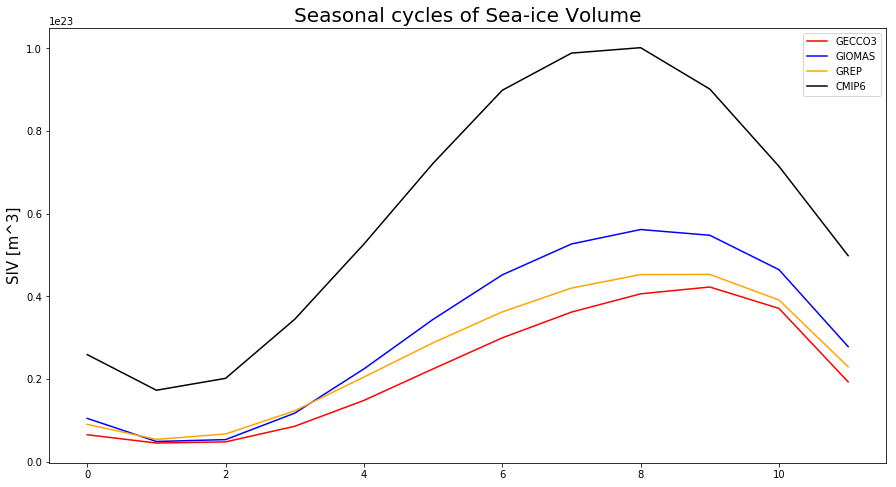

In [18]:
fig, (ax) = plt.subplots(1, 1, figsize=(15, 8))

# ax1=ax.twinx()

# ax.plot(Weighted_Mean_Mod(SIC_Reanan.groupby('time.month').mean(dim='time'),
#                           wgt_gc_models,
#                           GECCO_SIT.groupby('time.month').mean(dim='time')),color="orange")

# ax.plot(Weighted_Mean_Mod(SIC_Reanan.groupby('time.month').mean(dim='time'),
#                           wgt_gc_models,
#                           GIOMAS_SIT.groupby('time.month').mean(dim='time')),color="green")

# ax.plot(Weighted_Mean_Mod(SIC_Reanan1.groupby('time.month').mean(dim='time'),
#                           wgt_gc_models,
#                           GREP_SIT.groupby('time.month').mean(dim='time')),color="blue")

# ax.plot(Weighted_Mean_Obs(clm_sic_Obs,wgt_gc_Obs,clm_sit_Obs),color="black")


# ax.plot(Weighted_Mean_Mod(clim_anom_sic(ds_sic_1)[0],wgt_gc_models,clim_anom(ds_sit_1)[0]))


# ax.plot((SIC_Reanan*GECCO_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').mean(dim=('ni','nj'),skipna=True),color="orange",linestyle="dashed")
# ax.plot((SIC_Reanan*GIOMAS_SIT1*wgt_gc_models).groupby('time.month').mean(dim='time').mean(dim=('ni','nj'),skipna=True),color="red",linestyle="dashed")
# ax.plot(Mod_VOL.mean(dim=('ni','nj'),skipna=True),color="blue")



ax.plot(GECCO3,color="red")
ax.plot(GIOMAS,color="blue")
ax.plot(GREP,color="orange")

# ax.plot(Mod_VOL.weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True),color="green")
ax.plot(EV_CS,color="black")


ax.set_ylabel("SIV [m^3]",fontsize=15)
ax.set_title("Seasonal cycles of Sea-ice Volume",fontsize=20)

location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["GECCO3","GIOMAS","GREP", "CMIP6","ENV-CS2"], loc=0, frameon=legend_drawn_flag)


# ax.plot(Weighted_Mean_Mod(SIC_Reanan_clm,wgt_gc_models,GIOMAS_SIT1),color="red")
# ax.plot(Weighted_Mean_Mod(clim_anom_sic(ds_sic_1)[0],wgt_gc_models,clim_anom(ds_sit_1)[0]),color="blue")
# ax1.plot(Weighted_Mean_Obs(clm_sic_Obs,wgt_gc_Obs,clm_sit_Obs),color="red")
# ax.plot(Weighted_Mean_Mod(SIC_Reanan_clm,wgt_gc_models,GECCO_SIT),color="orange")

# plt.savefig("SIT_Sat_RN.pdf",dpi=200)

plt.show()

In [22]:
sit_Obs = ds_sit_Ob.sea_ice_thickness.sel(time=slice('2002-06-01','2014-12-01'))
clm_sit_Obs = sit_Obs.groupby('time.month').mean(dim='time')
anm_sit_Obs = (sit_Obs.groupby('time.month') - clm_sit_Obs)

time    = anm_sit_Obs.time
time1   = clm_sit_Obs.month

In [23]:
sic_Obs = ds_sic_Ob.SIC.sel(time=slice('2002-06-01','2014-12-01'))
clm_sic_Obs = sic_Obs.groupby('time.month').mean(dim='time')
anm_sic_Obs = (sic_Obs.groupby('time.month') - clm_sic_Obs)
# time2    = anm_sic_Obs.time
# time12   = clm_sic_Obs.month

In [24]:
def clim_anom(data):
    sit = data.sithick.sel(time=slice('2002-06-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [25]:
def clim_anom_sic(data):
    sic = data.siconc.sel(time=slice('2002-06-01','2015-01-01'))
    clm = sic.groupby('time.month').mean(dim='time')
    anm = (sic.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sic)

# Adjusting SIT by weighting it by gridcells and sea-ice concentration: 

1. Multiplying the SIC matrix (Time, xc, yc) with Latitude weights (xc, yc) for the observations. In case of models, I will be using a variable called "areacelli" viz. the area of grid cell over sea-ice as weights to adjust the grid cells.

2. Then we use this modified sic file from 1 (which is sic adjusted with grid cell weights) to adjust the SIT. This will be done using a for loop. 



In [26]:
#Let's make a function for the weighted average (Only for observations):

def Weighted_Mean_Obs(SIC,WGT_GC,SIT):
    gc_adjusted_sic = np.einsum('kij,ij->kij',SIC,WGT_GC) 
    gc_adjusted_sic = xr.DataArray(gc_adjusted_sic,dims=["time","xc","yc" ])
    
    Wt_SIT = []
    for i in range(0,len(SIC)):
        sit = SIT[i].weighted(gc_adjusted_sic[i].fillna(0)).mean(("xc", "yc"), skipna=True)
        Wt_SIT.append(sit)
    
    Wt_SIT = xr.DataArray(Wt_SIT,dims=["time"])
    return (Wt_SIT)

In [27]:
# Function for CMIP6 models
def Weighted_Mean_Mod(SIC,WGT_GC,SIT):
    gc_adjusted_sic = np.einsum('kij,ij->kij',SIC,WGT_GC) 
    gc_adjusted_sic = xr.DataArray(gc_adjusted_sic,dims=["time","nj","ni" ])
    
    Wt_SIT = []
    for i in range(0,len(SIC)):
        sit = SIT[i].weighted(gc_adjusted_sic[i].fillna(0)).mean(("ni", "nj"), skipna=True)
        Wt_SIT.append(sit)
    
    Wt_SIT = xr.DataArray(Wt_SIT,dims=["time"])
    return (Wt_SIT)

# Making dataframes for the SIT Means:

### First, making dataframes for volumes using reanalysis for comparisons:  
### For seasonal cycle:

Calculated the volume by multiplying SIT, SIC and grid cell area. Then the averages are weighted by the grid cell area. 
This done for the the reanalysis datasets and modelled datasets. (1979-2014)

In [28]:
# function for calculating the volumes: 

def Mod_Vols_RN(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('1979-01-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('1979-01-01','2015-01-01'))*Area).groupby('time.month').mean(dim='time'))/100).weighted(Area.fillna(0)).sum(dim=('ni','nj'),skipna=True)
    return(Volume)

In [29]:
def Mod_Vols(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('1979-01-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('1979-01-01','2015-01-01'))*Area))/100)
    clm = Volume.groupby('time.month').mean(dim='time')
    anm = (Volume.groupby('time.month') - clm)
    return(Volume,clm,anm)

In [30]:
def RN_Vols(SIC,SIT,Area):
    Volume = SIC*SIT*Area
    clm = Volume.groupby('time.month').mean(dim='time')
    anm = (Volume.groupby('time.month') - clm)
    return(Volume,clm,anm)

In [31]:
def clim_anom(data):
    sit = data.sithick.sel(time=slice('2002-06-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [32]:
print(ds_sic_13.attrs['source_id'],
      ds_sic_15.attrs['source_id'],
      ds_sic_16.attrs['source_id'],
      ds_sic_17.attrs['source_id'],
      ds_sic_18.attrs['source_id'],
      ds_sic_19.attrs['source_id'])

E3SM-1-1-ECA EC-Earth3-AerChem EC-Earth3-CC EC-Earth3-Veg-LR EC-Earth3-Veg EC-Earth3


In [41]:
# Dataframe for SIV Averages:

# excluded are the models with extreme values:

Mod_RN_ACycle_list = pd.DataFrame(
    {'Time': GIOMAS.month,
     ds_sic_1.attrs['source_id']: Mod_Vols_RN(ds_sic_1,ds_sit_1,wgt_gc_models),
     ds_sic_2.attrs['source_id']: Mod_Vols_RN(ds_sic_2,ds_sit_2,wgt_gc_models),
     ds_sic_3.attrs['source_id']: Mod_Vols_RN(ds_sic_3,ds_sit_3,wgt_gc_models),
     ds_sic_4.attrs['source_id']: Mod_Vols_RN(ds_sic_4,ds_sit_4,wgt_gc_models),
     ds_sic_5.attrs['source_id']: Mod_Vols_RN(ds_sic_5,ds_sit_5,wgt_gc_models),
     ds_sic_6.attrs['source_id']: Mod_Vols_RN(ds_sic_6,ds_sit_6,wgt_gc_models),
     ds_sic_7.attrs['source_id']: Mod_Vols_RN(ds_sic_7,ds_sit_7,wgt_gc_models),
     ds_sic_8.attrs['source_id']: Mod_Vols_RN(ds_sic_8,ds_sit_8,wgt_gc_models),
     ds_sic_9.attrs['source_id']: Mod_Vols_RN(ds_sic_9,ds_sit_9,wgt_gc_models),
     ds_sic_10.attrs['source_id']: Mod_Vols_RN(ds_sic_10,ds_sit_10,wgt_gc_models),
     ds_sic_11.attrs['source_id']: Mod_Vols_RN(ds_sic_11,ds_sit_11,wgt_gc_models),
     ds_sic_12.attrs['source_id']: Mod_Vols_RN(ds_sic_12,ds_sit_12,wgt_gc_models),
#      ds_sic_13.attrs['source_id']: Mod_Vols_RN(ds_sic_13,ds_sit_13,wgt_gc_models),
     ds_sic_14.attrs['source_id']: Mod_Vols_RN(ds_sic_14,ds_sit_14,wgt_gc_models),
#      ds_sic_15.attrs['source_id']: Mod_Vols_RN(ds_sic_15,ds_sit_15,wgt_gc_models),
#      ds_sic_16.attrs['source_id']: Mod_Vols_RN(ds_sic_16,ds_sit_16,wgt_gc_models),
#      ds_sic_17.attrs['source_id']: Mod_Vols_RN(ds_sic_17,ds_sit_17,wgt_gc_models),
#      ds_sic_18.attrs['source_id']: Mod_Vols_RN(ds_sic_18,ds_sit_18,wgt_gc_models),
#      ds_sic_19.attrs['source_id']: Mod_Vols_RN(ds_sic_19,ds_sit_19,wgt_gc_models),
     ds_sic_20.attrs['source_id']: Mod_Vols_RN(ds_sic_20,ds_sit_20,wgt_gc_models),
     ds_sic_21.attrs['source_id']: Mod_Vols_RN(ds_sic_21,ds_sit_21,wgt_gc_models),
     ds_sic_22.attrs['source_id']: Mod_Vols_RN(ds_sic_22,ds_sit_22,wgt_gc_models),
     ds_sic_23.attrs['source_id']: Mod_Vols_RN(ds_sic_23,ds_sit_23,wgt_gc_models),
     ds_sic_24.attrs['source_id']: Mod_Vols_RN(ds_sic_24,ds_sit_24,wgt_gc_models),
     ds_sic_25.attrs['source_id']: Mod_Vols_RN(ds_sic_25,ds_sit_25,wgt_gc_models),
     ds_sic_26.attrs['source_id']: Mod_Vols_RN(ds_sic_26,ds_sit_26,wgt_gc_models),
     ds_sic_27.attrs['source_id']: Mod_Vols_RN(ds_sic_27,ds_sit_27,wgt_gc_models),
     ds_sic_28.attrs['source_id']: Mod_Vols_RN(ds_sic_28,ds_sit_28,wgt_gc_models),
     ds_sic_29.attrs['source_id']: Mod_Vols_RN(ds_sic_29,ds_sit_29,wgt_gc_models),
     ds_sic_30.attrs['source_id']: Mod_Vols_RN(ds_sic_30,ds_sit_30,wgt_gc_models),
     ds_sic_31.attrs['source_id']: Mod_Vols_RN(ds_sic_31,ds_sit_31,wgt_gc_models),
     ds_sic_32.attrs['source_id']: Mod_Vols_RN(ds_sic_32,ds_sit_32,wgt_gc_models),
     ds_sic_33.attrs['source_id']: Mod_Vols_RN(ds_sic_33,ds_sit_33,wgt_gc_models),
     ds_sic_34.attrs['source_id']: Mod_Vols_RN(ds_sic_34,ds_sit_34,wgt_gc_models),
     ds_sic_35.attrs['source_id']: Mod_Vols_RN(ds_sic_35,ds_sit_35,wgt_gc_models),
     'GIOMAS': GIOMAS,
     'GECCO3': GECCO3,
     'GREP'  : GREP,
                                  })                                                            

In [42]:
Mod_RN_ACycle_list['MMM'] = Mod_RN_ACycle_list.iloc[:, 1:30].mean(axis=1)
Mod_RN_ACycle_list

Time    ACCESS-CM2  ACCESS-ESM1-5     CESM2-FV2  CESM2-WACCM-FV2  \
0      1  6.655354e+21   1.720316e+22  1.721369e+22     2.035578e+22   
1      2  2.349241e+21   1.102140e+22  1.006170e+22     1.324166e+22   
2      3  2.009254e+21   9.356525e+21  9.010996e+21     1.233159e+22   
3      4  4.384951e+21   1.117202e+22  1.266718e+22     1.581342e+22   
4      5  9.208758e+21   1.520918e+22  1.981340e+22     2.273273e+22   
5      6  1.646672e+22   2.203902e+22  2.786716e+22     3.098727e+22   
6      7  2.403228e+22   2.982399e+22  3.608776e+22     3.925533e+22   
7      8  3.060075e+22   3.729921e+22  4.392912e+22     4.705651e+22   
8      9  3.497484e+22   4.293410e+22  4.953142e+22     5.301032e+22   
9     10  3.622951e+22   4.541340e+22  5.195813e+22     5.537465e+22   
10    11  3.211290e+22   4.160216e+22  4.753653e+22     5.078355e+22   
11    12  1.949591e+22   2.969011e+22  3.332434e+22     3.609530e+22   

     CESM2-WACCM         CESM2  CMCC-CM2-SR5     CMCC-ESM2    CNRM-CM6-1  ...  \
0   2.058408e+22  1.876677e+22  9.670880e+21  9.914472e+21  3.524141e+21  ...   
1   1.187300e+22  1.047147e+22  4.529878e+21  4.543122e+21  1.195543e+21  ...   
2   1.006700e+22  8.441190e+21  3.284636e+21  3.298949e+21  9.918560e+20  ...   
3   1.401841e+22  1.175977e+22  4.876199e+21  5.019669e+21  2.416811e+21  ...   
4   2.182974e+22  1.919820e+22  9.870510e+21  1.011175e+22  5.912210e+21  ...   
5   3.075336e+22  2.763804e+22  1.657375e+22  1.697317e+22  1.154383e+22  ...   
6   3.958709e+22  3.622232e+22  2.401938e+22  2.450163e+22  1.877475e+22  ...   
7   4.807627e+22  4.447917e+22  3.149324e+22  3.207737e+22  2.617607e+22  ...   
8   5.475067e+22  5.066581e+22  3.708489e+22  3.757178e+22  3.144515e+22  ...   
9   5.761021e+22  5.346682e+22  3.869532e+22  3.901532e+22  3.179893e+22  ...   
10  5.300460e+22  4.957033e+22  3.337905e+22  3.393362e+22  2.529857e+22  ...   
11  3.826294e+22  3.578994e+22  2.129405e+22  2.196187e+22  1.261525e+22  ...   

      MRI-ESM2-0         NESM3       NorCPM1    NorESM2-LM    NorESM2-MM  \
0   2.130030e+22  2.216599e+21  1.784096e+22  1.214424e+22  1.149983e+22   
1   1.234842e+22  4.941652e+20  1.298454e+22  9.287397e+21  8.065694e+21   
2   1.028082e+22  5.472138e+20  1.480714e+22  9.496918e+21  8.034319e+21   
3   1.196261e+22  1.899833e+21  2.193745e+22  1.155031e+22  1.026451e+22   
4   1.779604e+22  5.259726e+21  3.168842e+22  1.530803e+22  1.441962e+22   
5   2.594157e+22  1.061454e+22  4.255885e+22  2.031186e+22  2.004182e+22   
6   3.400308e+22  1.670789e+22  5.206676e+22  2.545503e+22  2.576073e+22   
7   4.103683e+22  2.309833e+22  5.947595e+22  3.001237e+22  3.100715e+22   
8   4.617887e+22  2.844388e+22  6.290072e+22  3.265441e+22  3.395835e+22   
9   4.902249e+22  3.148991e+22  5.998141e+22  3.233129e+22  3.352633e+22   
10  4.807812e+22  2.841329e+22  4.870875e+22  2.790453e+22  2.830167e+22   
11  3.826934e+22  1.228862e+22  3.182660e+22  1.949749e+22  1.918354e+22   

     UKESM1-0-LL        GIOMAS        GECCO3          GREP           MMM  
0   2.343041e+22  1.046831e+22  6.511994e+21  9.019039e+21  1.175950e+22  
1   1.210624e+22  4.880912e+21  4.506128e+21  5.389393e+21  6.850144e+21  
2   1.131800e+22  5.331865e+21  4.783458e+21  6.702058e+21  6.254987e+21  
3   1.666522e+22  1.173640e+22  8.561674e+21  1.230460e+22  8.651499e+21  
4   2.338316e+22  2.243932e+22  1.481686e+22  2.046369e+22  1.368738e+22  
5   3.115089e+22  3.442422e+22  2.244628e+22  2.875635e+22  2.027421e+22  
6   3.981137e+22  4.518472e+22  2.994854e+22  3.623141e+22  2.739175e+22  
7   4.813264e+22  5.265456e+22  3.617718e+22  4.198963e+22  3.415813e+22  
8   5.499520e+22  5.614803e+22  4.059730e+22  4.525801e+22  3.917030e+22  
9   5.840953e+22  5.476726e+22  4.224964e+22  4.529421e+22  4.055758e+22  
10  5.580105e+22  4.644153e+22  3.706796e+22  3.910240e+22  3.578517e+22  
11  4.283226e+22  2.782109e+22  1.930053e+22  2.295041e+22  2.357824e+22  

[12 rows x 34 columns]

In [103]:
Mod_RN_ACycle_list['MMM+STD'] = Mod_RN_ACycle_list['MMM'] + Mod_RN_ACycle_list.iloc[:, 1:30].std(axis=1)
Mod_RN_ACycle_list['MMM-STD'] = Mod_RN_ACycle_list['MMM'] - Mod_RN_ACycle_list.iloc[:, 1:30].std(axis=1)

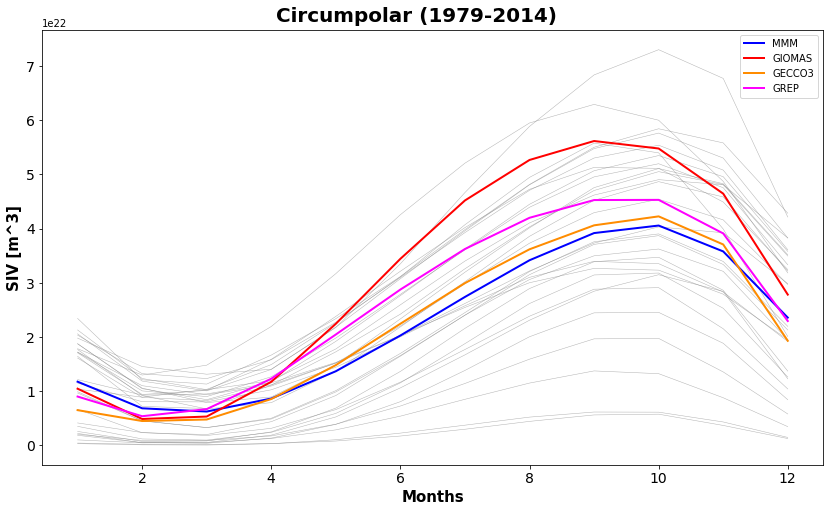

In [27]:
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

fig.suptitle("Circumpolar (1979-2014) ", fontweight ='bold',fontsize=20, y=0.92)

Mod_RN_ACycle_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

Mod_RN_ACycle_list.plot(x="Time", y=["MMM", "GIOMAS","GECCO3","GREP"],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"darkorange","magenta"],ax=ax)

# ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['MMM+STD'], Mod_RN_ACycle_list['MMM-STD'],
#                facecolor ='blue',alpha=0.2)
# ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['Obs+STD'], Mod_RN_ACycle_list['Obs-STD'],
#                facecolor ='red',alpha=0.2)

#plt.legend(['Models','Observation'])
plt.ylabel('SIV [m^3]',fontsize=15,fontweight ='bold')
plt.xlabel('Months',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('SIV_Rean-MMM_AnnualCycle_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Volumes comparision with the satellite data: (2002-2014) 

In [43]:
# function for calculating the volumes: 

def Mod_Vols_EC2(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('2002-06-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('2002-06-01','2015-01-01'))*Area).groupby('time.month').mean(dim='time'))/100).weighted(Area.fillna(0)).sum(dim=('ni','nj'),skipna=True)
    return(Volume)

In [44]:
# Dataframe for SIT Averages:

# excluded are the models with extreme values:

Mod_EC2_ACycle_list = pd.DataFrame(
    {'Time': EV_CS.month,
     ds_sic_1.attrs['source_id']: Mod_Vols_EC2(ds_sic_1,ds_sit_1,wgt_gc_models),
     ds_sic_2.attrs['source_id']: Mod_Vols_EC2(ds_sic_2,ds_sit_2,wgt_gc_models),
     ds_sic_3.attrs['source_id']: Mod_Vols_EC2(ds_sic_3,ds_sit_3,wgt_gc_models),
     ds_sic_4.attrs['source_id']: Mod_Vols_EC2(ds_sic_4,ds_sit_4,wgt_gc_models),
     ds_sic_5.attrs['source_id']: Mod_Vols_EC2(ds_sic_5,ds_sit_5,wgt_gc_models),
     ds_sic_6.attrs['source_id']: Mod_Vols_EC2(ds_sic_6,ds_sit_6,wgt_gc_models),
     ds_sic_7.attrs['source_id']: Mod_Vols_EC2(ds_sic_7,ds_sit_7,wgt_gc_models),
     ds_sic_8.attrs['source_id']: Mod_Vols_EC2(ds_sic_8,ds_sit_8,wgt_gc_models),
     ds_sic_9.attrs['source_id']: Mod_Vols_EC2(ds_sic_9,ds_sit_9,wgt_gc_models),
     ds_sic_10.attrs['source_id']: Mod_Vols_EC2(ds_sic_10,ds_sit_10,wgt_gc_models),
     ds_sic_11.attrs['source_id']: Mod_Vols_EC2(ds_sic_11,ds_sit_11,wgt_gc_models),
     ds_sic_12.attrs['source_id']: Mod_Vols_EC2(ds_sic_12,ds_sit_12,wgt_gc_models),
#      ds_sic_13.attrs['source_id']: Mod_Vols_EC2(ds_sic_13,ds_sit_13,wgt_gc_models),
     ds_sic_14.attrs['source_id']: Mod_Vols_EC2(ds_sic_14,ds_sit_14,wgt_gc_models),
#      ds_sic_15.attrs['source_id']: Mod_Vols_EC2(ds_sic_15,ds_sit_15,wgt_gc_models),
#      ds_sic_16.attrs['source_id']: Mod_Vols_EC2(ds_sic_16,ds_sit_16,wgt_gc_models),
#      ds_sic_17.attrs['source_id']: Mod_Vols_EC2(ds_sic_17,ds_sit_17,wgt_gc_models),
#      ds_sic_18.attrs['source_id']: Mod_Vols_EC2(ds_sic_18,ds_sit_18,wgt_gc_models),
#      ds_sic_19.attrs['source_id']: Mod_Vols_EC2(ds_sic_19,ds_sit_19,wgt_gc_models),
     ds_sic_20.attrs['source_id']: Mod_Vols_EC2(ds_sic_20,ds_sit_20,wgt_gc_models),
     ds_sic_21.attrs['source_id']: Mod_Vols_EC2(ds_sic_21,ds_sit_21,wgt_gc_models),
     ds_sic_22.attrs['source_id']: Mod_Vols_EC2(ds_sic_22,ds_sit_22,wgt_gc_models),
     ds_sic_23.attrs['source_id']: Mod_Vols_EC2(ds_sic_23,ds_sit_23,wgt_gc_models),
     ds_sic_24.attrs['source_id']: Mod_Vols_EC2(ds_sic_24,ds_sit_24,wgt_gc_models),
     ds_sic_25.attrs['source_id']: Mod_Vols_EC2(ds_sic_25,ds_sit_25,wgt_gc_models),
     ds_sic_26.attrs['source_id']: Mod_Vols_EC2(ds_sic_26,ds_sit_26,wgt_gc_models),
     ds_sic_27.attrs['source_id']: Mod_Vols_EC2(ds_sic_27,ds_sit_27,wgt_gc_models),
     ds_sic_28.attrs['source_id']: Mod_Vols_EC2(ds_sic_28,ds_sit_28,wgt_gc_models),
     ds_sic_29.attrs['source_id']: Mod_Vols_EC2(ds_sic_29,ds_sit_29,wgt_gc_models),
     ds_sic_30.attrs['source_id']: Mod_Vols_EC2(ds_sic_30,ds_sit_30,wgt_gc_models),
     ds_sic_31.attrs['source_id']: Mod_Vols_EC2(ds_sic_31,ds_sit_31,wgt_gc_models),
     ds_sic_32.attrs['source_id']: Mod_Vols_EC2(ds_sic_32,ds_sit_32,wgt_gc_models),
     ds_sic_33.attrs['source_id']: Mod_Vols_EC2(ds_sic_33,ds_sit_33,wgt_gc_models),
     ds_sic_34.attrs['source_id']: Mod_Vols_EC2(ds_sic_34,ds_sit_34,wgt_gc_models),
     ds_sic_35.attrs['source_id']: Mod_Vols_EC2(ds_sic_35,ds_sit_35,wgt_gc_models),
     'EV-CS2': EV_CS,
                                  })                                                            

In [45]:
Mod_EC2_ACycle_list['MMM'] = Mod_EC2_ACycle_list.iloc[:, 1:30].mean(axis=1)
Mod_EC2_ACycle_list

Time    ACCESS-CM2  ACCESS-ESM1-5     CESM2-FV2  CESM2-WACCM-FV2  \
0      1  6.413457e+21   1.645696e+22  1.643615e+22     1.874002e+22   
1      2  2.184055e+21   1.063262e+22  9.568443e+21     1.213001e+22   
2      3  1.973528e+21   8.923945e+21  8.531695e+21     1.133503e+22   
3      4  4.184000e+21   1.026677e+22  1.195765e+22     1.448208e+22   
4      5  8.997216e+21   1.411152e+22  1.871411e+22     2.074246e+22   
5      6  1.643444e+22   2.047176e+22  2.668325e+22     2.868041e+22   
6      7  2.347385e+22   2.770158e+22  3.470398e+22     3.661981e+22   
7      8  2.990141e+22   3.495533e+22  4.253254e+22     4.412668e+22   
8      9  3.401121e+22   4.052785e+22  4.797926e+22     4.992575e+22   
9     10  3.501685e+22   4.333249e+22  5.043137e+22     5.205541e+22   
10    11  3.111380e+22   3.988834e+22  4.599572e+22     4.755033e+22   
11    12  1.900363e+22   2.812242e+22  3.213749e+22     3.351823e+22   

     CESM2-WACCM         CESM2  CMCC-CM2-SR5     CMCC-ESM2    CNRM-CM6-1  ...  \
0   1.750376e+22  1.737843e+22  9.208899e+21  8.660461e+21  2.680179e+21  ...   
1   9.611144e+21  9.243264e+21  4.559498e+21  3.860369e+21  7.778579e+20  ...   
2   8.125214e+21  7.193746e+21  3.383262e+21  2.695456e+21  6.525073e+20  ...   
3   1.175639e+22  1.051749e+22  4.707950e+21  4.187746e+21  1.933209e+21  ...   
4   1.900391e+22  1.783842e+22  9.145572e+21  8.934822e+21  5.266659e+21  ...   
5   2.725041e+22  2.618451e+22  1.550412e+22  1.542634e+22  1.060015e+22  ...   
6   3.577258e+22  3.445525e+22  2.239051e+22  2.244171e+22  1.765073e+22  ...   
7   4.405480e+22  4.237633e+22  2.910659e+22  2.954603e+22  2.493449e+22  ...   
8   5.060279e+22  4.857465e+22  3.449592e+22  3.491642e+22  2.998049e+22  ...   
9   5.318769e+22  5.179598e+22  3.580912e+22  3.637186e+22  3.022329e+22  ...   
10  4.855595e+22  4.816528e+22  3.077175e+22  3.138196e+22  2.381301e+22  ...   
11  3.438603e+22  3.450111e+22  1.966374e+22  1.991177e+22  1.141527e+22  ...   

    MPI-ESM1-2-HR  MPI-ESM1-2-LR    MRI-ESM2-0         NESM3       NorCPM1  \
0    3.781621e+21   1.772395e+21  2.003212e+22  1.640925e+21  1.671996e+22   
1    2.502706e+21   7.583280e+20  1.129365e+22  3.153135e+20  1.197665e+22   
2    1.999380e+21   7.210134e+20  9.424322e+21  3.733760e+20  1.380360e+22   
3    3.076549e+21   1.509176e+21  1.098802e+22  1.508027e+21  2.087654e+22   
4    6.662033e+21   3.618730e+21  1.688311e+22  4.713828e+21  3.020269e+22   
5    1.124085e+22   7.080077e+21  2.492392e+22  9.831477e+21  4.082866e+22   
6    1.705054e+22   1.133903e+22  3.251977e+22  1.559200e+22  5.026317e+22   
7    2.287031e+22   1.598813e+22  3.908413e+22  2.167295e+22  5.762083e+22   
8    2.704893e+22   1.964835e+22  4.394470e+22  2.666882e+22  6.159601e+22   
9    2.750216e+22   1.994332e+22  4.654763e+22  2.963954e+22  5.918361e+22   
10   2.047339e+22   1.363955e+22  4.530401e+22  2.653761e+22  4.767688e+22   
11   9.775070e+21   5.686168e+21  3.611123e+22  1.089698e+22  3.065299e+22   

      NorESM2-LM    NorESM2-MM   UKESM1-0-LL        EV-CS2           MMM  
0   1.136377e+22  1.047013e+22  2.109915e+22  2.589400e+22  1.032100e+22  
1   8.626675e+21  7.063065e+21  1.069290e+22  1.727789e+22  5.833668e+21  
2   8.782055e+21  6.958474e+21  9.890322e+21  2.015507e+22  5.325203e+21  
3   1.078292e+22  9.030408e+21  1.448180e+22  3.445367e+22  7.505604e+21  
4   1.445337e+22  1.320202e+22  2.110998e+22  5.264109e+22  1.226565e+22  
5   1.952101e+22  1.902981e+22  2.836129e+22  7.217807e+22  1.861717e+22  
6   2.471835e+22  2.482630e+22  3.627218e+22  8.983853e+22  2.534258e+22  
7   2.933278e+22  3.030868e+22  4.460339e+22  9.882232e+22  3.187096e+22  
8   3.184137e+22  3.323484e+22  5.144527e+22  1.001369e+23  3.665788e+22  
9   3.155081e+22  3.273318e+22  5.461059e+22  9.012308e+22  3.803169e+22  
10  2.717833e+22  2.743873e+22  5.191554e+22  7.143120e+22  3.336815e+22  
11  1.865510e+22  1.835851e+22  3.936199e+22  4.982425e+22  2.163543e+22  

[12 rows x 32 columns]

In [108]:
Mod_EC2_ACycle_list['MMM+STD'] = Mod_EC2_ACycle_list['MMM'] + Mod_EC2_ACycle_list.iloc[:, 1:30].std(axis=1)
Mod_EC2_ACycle_list['MMM-STD'] = Mod_EC2_ACycle_list['MMM'] - Mod_EC2_ACycle_list.iloc[:, 1:30].std(axis=1)

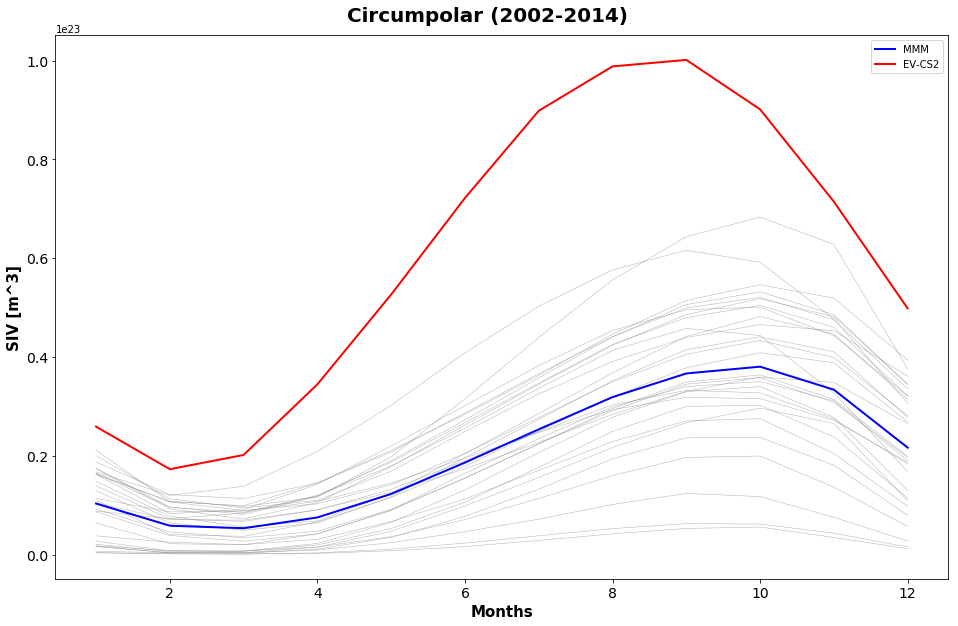

In [48]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

fig.suptitle("Circumpolar (2002-2014)", fontweight ='bold',fontsize=20, y=0.92)


Mod_EC2_ACycle_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)


Mod_EC2_ACycle_list.plot(x="Time", y=["MMM", "EV-CS2"],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red'],ax=ax)

# ax.fill_between(Mod_EC2_ACycle_list["Time"],Mod_EC2_ACycle_list['MMM+STD'], Mod_EC2_ACycle_list['MMM-STD'],
#                facecolor ='blue',alpha=0.2)
# ax.fill_between(Mod_EC2_ACycle_list["Time"],Mod_EC2_ACycle_list['Obs+STD'], Mod_EC2_ACycle_list['Obs-STD'],
#                facecolor ='red',alpha=0.2)

#plt.legend(['Models','Observation'])
plt.ylabel('SIV [m^3]',fontsize=15,fontweight ='bold')
plt.xlabel('Months',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('SIV_EV-CS2-MMM_AnnualCycle_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [46]:
df_All = pd.DataFrame(
    {'Time': GIOMAS.month,
     "MMM":Mod_RN_ACycle_list['MMM'],
     "GIOMAS":Mod_RN_ACycle_list['GIOMAS'],
     "GECCO3":Mod_RN_ACycle_list['GECCO3'],
     "GREP":Mod_RN_ACycle_list['GREP'],
     "EV-CS2":Mod_EC2_ACycle_list['EV-CS2']
          })

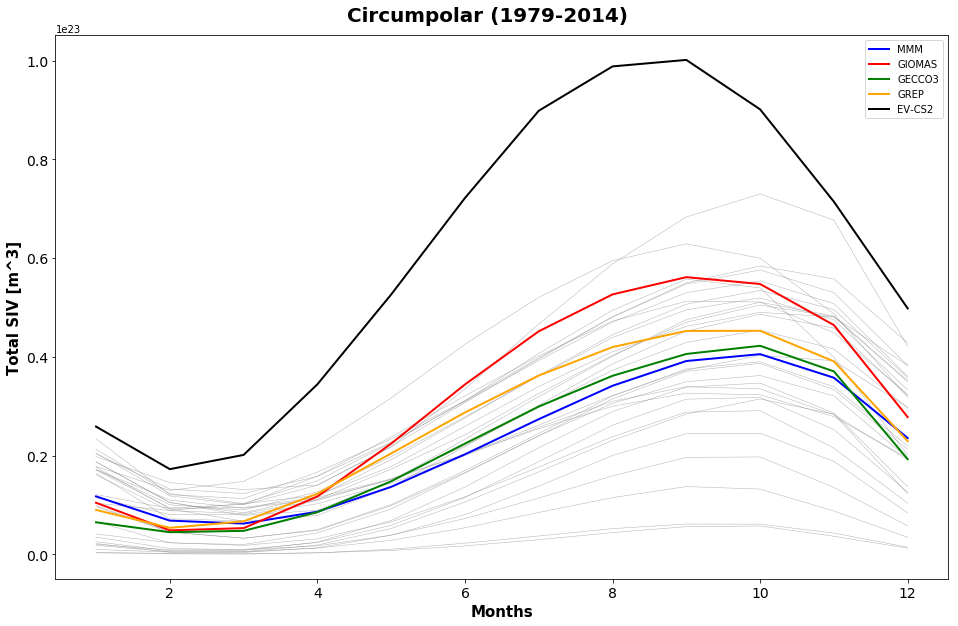

In [66]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

fig.suptitle("Circumpolar (1979-2014)", fontweight ='bold',fontsize=20, y=0.92)


Mod_RN_ACycle_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

df_All.plot(x="Time", kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"green","orange","black"],ax=ax)

# Mod_EC2_ACycle_list.plot(x="Time", y=["EV-CS2"],
#                      kind="line",alpha=1.0,linewidth=2,
#                      color=['black'],ax=ax)

# ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['MMM+STD'], Mod_RN_ACycle_list['MMM-STD'],
#                facecolor ='blue',alpha=0.2)
# ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['Obs+STD'], Mod_RN_ACycle_list['Obs-STD'],
#                facecolor ='red',alpha=0.2)

#plt.legend(['Models','Observation'])
ax.set_ylabel('Total SIV [m^3]',fontsize=15,fontweight ='bold')
ax.set_xlabel('Months',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.savefig('TotalSIV_Obs-MMM_AnnualCycle_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

### Dataframe for anomalies:

In [259]:
# Dataframe for SIV Anomalies:

# excluded are the models with extreme values:

Mod_Anom_list = pd.DataFrame(
    {'Time': GIOMAS_SIT.time,
     ds_sic_1.attrs['source_id']: Mod_Vols(ds_sic_1,ds_sit_1,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_2.attrs['source_id']: Mod_Vols(ds_sic_2,ds_sit_2,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_3.attrs['source_id']: Mod_Vols(ds_sic_3,ds_sit_3,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_4.attrs['source_id']: Mod_Vols(ds_sic_4,ds_sit_4,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_5.attrs['source_id']: Mod_Vols(ds_sic_5,ds_sit_5,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_6.attrs['source_id']: Mod_Vols(ds_sic_6,ds_sit_6,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_7.attrs['source_id']: Mod_Vols(ds_sic_7,ds_sit_7,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_8.attrs['source_id']: Mod_Vols(ds_sic_8,ds_sit_8,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_9.attrs['source_id']: Mod_Vols(ds_sic_9,ds_sit_9,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_10.attrs['source_id']: Mod_Vols(ds_sic_10,ds_sit_10,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_11.attrs['source_id']: Mod_Vols(ds_sic_11,ds_sit_11,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_12.attrs['source_id']: Mod_Vols(ds_sic_12,ds_sit_12,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_13.attrs['source_id']: Mod_Vols(ds_sic_13,ds_sit_13,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_14.attrs['source_id']: Mod_Vols(ds_sic_14,ds_sit_14,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_15.attrs['source_id']: Mod_Vols(ds_sic_15,ds_sit_15,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_16.attrs['source_id']: Mod_Vols(ds_sic_16,ds_sit_16,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_17.attrs['source_id']: Mod_Vols(ds_sic_17,ds_sit_17,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_18.attrs['source_id']: Mod_Vols(ds_sic_18,ds_sit_18,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_19.attrs['source_id']: Mod_Vols(ds_sic_19,ds_sit_19,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_20.attrs['source_id']: Mod_Vols(ds_sic_20,ds_sit_20,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_21.attrs['source_id']: Mod_Vols(ds_sic_21,ds_sit_21,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_22.attrs['source_id']: Mod_Vols(ds_sic_22,ds_sit_22,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_23.attrs['source_id']: Mod_Vols(ds_sic_23,ds_sit_23,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_24.attrs['source_id']: Mod_Vols(ds_sic_24,ds_sit_24,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_25.attrs['source_id']: Mod_Vols(ds_sic_25,ds_sit_25,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_26.attrs['source_id']: Mod_Vols(ds_sic_26,ds_sit_26,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_27.attrs['source_id']: Mod_Vols(ds_sic_27,ds_sit_27,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_28.attrs['source_id']: Mod_Vols(ds_sic_28,ds_sit_28,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_29.attrs['source_id']: Mod_Vols(ds_sic_29,ds_sit_29,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_30.attrs['source_id']: Mod_Vols(ds_sic_30,ds_sit_30,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_31.attrs['source_id']: Mod_Vols(ds_sic_31,ds_sit_31,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_32.attrs['source_id']: Mod_Vols(ds_sic_32,ds_sit_32,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_33.attrs['source_id']: Mod_Vols(ds_sic_33,ds_sit_33,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_34.attrs['source_id']: Mod_Vols(ds_sic_34,ds_sit_34,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_35.attrs['source_id']: Mod_Vols(ds_sic_35,ds_sit_35,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     'GIOMAS': RN_Vols(SIC_Reanan,GIOMAS_SIT,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     'GECCO3': RN_Vols(SIC_Reanan,GECCO_SIT,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
                                  })                                                            

In [260]:
Mod_Anom_list['Time'] = pd.to_datetime(Mod_Anom_list['Time'])
Mod_Anom_list = Mod_Anom_list.set_index('Time')

In [261]:
# To accomodate different time-series of varying lengths:

df_anom = pd.DataFrame(
    {'Time': GIOMAS_SIT.time.sel(time=slice('1993-01-01','2015-01-01')),
     'GREP'  : ((GREP_SIT*wgt_gc_models*SIC_Reanan1.mean(dim="time"))-GREP).mean(dim=('ni','nj','month')),
                                  })
df_anom1 = pd.DataFrame(
    {'Time': sit_Obs_Regridded.time,
     'ENV-CS2'  : ((sit_Obs_Regridded*SIC_Obs_Regridded*wgt_gc_models).groupby('time.month') - (sit_Obs_Regridded*SIC_Obs_Regridded*wgt_gc_models).groupby('time.month').mean(dim='time')).weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
                                  })   

In [262]:
df_anom['Time'] = pd.to_datetime(df_anom['Time'])
df_anom = df_anom.set_index('Time')

In [263]:
df_anom1['Time'] = pd.to_datetime(df_anom1['Time'])
df_anom1 = df_anom1.set_index('Time')

In [264]:
df2 = pd.concat([df_anom, df_anom1, Mod_Anom_list], axis=1)

In [269]:
Mod_Anom_list['ENV-CS2'] = df2.iloc[:,1]
Mod_Anom_list['GREP'] = df2.iloc[:,0]

In [562]:
Mod_Anom_list['MMM'] = Mod_Anom_list.iloc[:, 0:29].mean(axis=1)
Mod_Anom_list['Time'] = GIOMAS_SIT.time

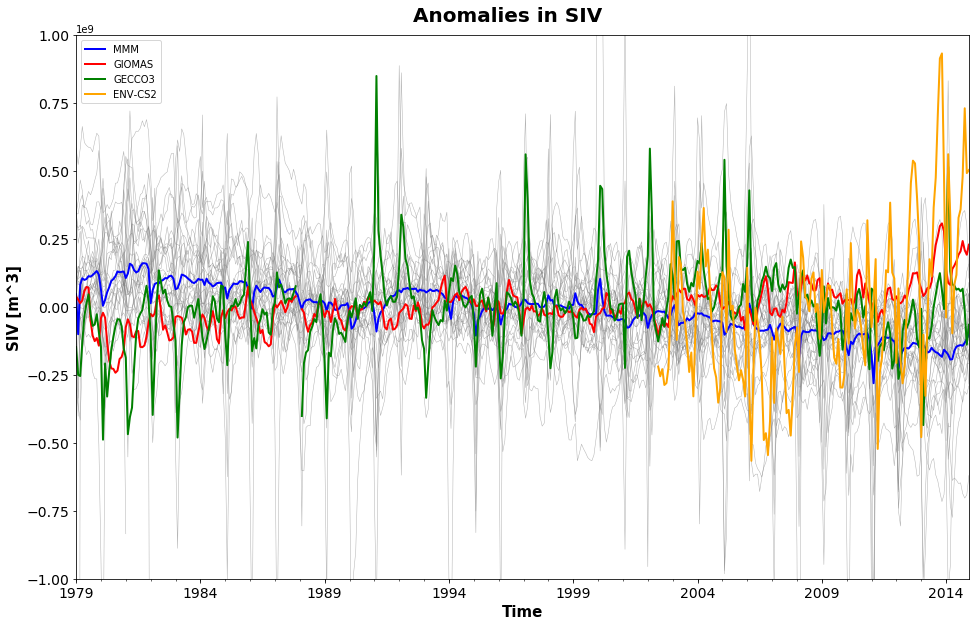

In [581]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

ax.set_ylim(-1*10**9,1*10**9)

fig.suptitle("Anomalies in SIV", fontweight ='bold',fontsize=20, y=0.92)

Mod_Anom_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

Mod_Anom_list.plot(x="Time", y=["MMM", "GIOMAS","GECCO3",'ENV-CS2'],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"green","orange"],ax=ax)

#plt.legend(['Models','Observation'])
ax.set_ylabel('SIV [m^3]',fontsize=15,fontweight ='bold')
ax.set_xlabel('Time',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.savefig('SIV_Obs-MMM_Anom_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
def RN_SIT_Anom(sit):
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [448]:
def clim_anom(data):
    sit = data.sithick.sel(time=slice('1979-01-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [528]:
# Dataframe for SIT Anomalies:

Mod_SIT_Anom_list = pd.DataFrame(
    {'Time': GIOMAS_SIT.time,
     ds_sic_1.attrs['source_id']: clim_anom(ds_sit_1)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_2.attrs['source_id']: clim_anom(ds_sit_2)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_3.attrs['source_id']: clim_anom(ds_sit_3)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_4.attrs['source_id']: clim_anom(ds_sit_4)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_5.attrs['source_id']: clim_anom(ds_sit_5)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_6.attrs['source_id']: clim_anom(ds_sit_6)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_7.attrs['source_id']: clim_anom(ds_sit_7)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_8.attrs['source_id']: clim_anom(ds_sit_8)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_9.attrs['source_id']: clim_anom(ds_sit_9)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_10.attrs['source_id']: clim_anom(ds_sit_10)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_11.attrs['source_id']: clim_anom(ds_sit_11)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_12.attrs['source_id']: clim_anom(ds_sit_12)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
#      ds_sic_13.attrs['source_id']: clim_anom(ds_sit_13)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_14.attrs['source_id']: clim_anom(ds_sit_14)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
#      ds_sic_15.attrs['source_id']: clim_anom(ds_sit_15)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
#      ds_sic_16.attrs['source_id']: clim_anom(ds_sit_16)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
#      ds_sic_17.attrs['source_id']: clim_anom(ds_sit_17)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
#      ds_sic_18.attrs['source_id']: clim_anom(ds_sit_18)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
#      ds_sic_19.attrs['source_id']: clim_anom(ds_sit_19)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_20.attrs['source_id']: clim_anom(ds_sit_20)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_21.attrs['source_id']: clim_anom(ds_sit_21)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_22.attrs['source_id']: clim_anom(ds_sit_22)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_23.attrs['source_id']: clim_anom(ds_sit_23)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_24.attrs['source_id']: clim_anom(ds_sit_24)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_25.attrs['source_id']: clim_anom(ds_sit_25)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_26.attrs['source_id']: clim_anom(ds_sit_26)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_27.attrs['source_id']: clim_anom(ds_sit_27)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_28.attrs['source_id']: clim_anom(ds_sit_28)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_29.attrs['source_id']: clim_anom(ds_sit_29)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_30.attrs['source_id']: clim_anom(ds_sit_30)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_31.attrs['source_id']: clim_anom(ds_sit_31)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_32.attrs['source_id']: clim_anom(ds_sit_32)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_33.attrs['source_id']: clim_anom(ds_sit_33)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_34.attrs['source_id']: clim_anom(ds_sit_34)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     ds_sic_35.attrs['source_id']: clim_anom(ds_sit_35)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     'GIOMAS': RN_SIT_Anom(GIOMAS_SIT)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
     'GECCO3': RN_SIT_Anom(GECCO_SIT)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
                                  })                                                            

In [557]:
Mod_SIT_Anom_list['Time'] = pd.to_datetime(Mod_SIT_Anom_list['Time'])
Mod_SIT_Anom_list = Mod_SIT_Anom_list.set_index('Time')

In [529]:
Mod_SIT_Anom_list['MMM'] = Mod_SIT_Anom_list.iloc[:, 0:29].mean(axis=1)

In [565]:
# To accomodate different time-series of varying lengths:

df_SIT_anom = pd.DataFrame(
    {'Time': GIOMAS_SIT.time.sel(time=slice('1993-01-01','2015-01-01')),
     'GREP': RN_SIT_Anom(GREP_SIT)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
                                  })
df_SIT_anom1 = pd.DataFrame(
    {'Time': sit_Obs_Regridded.time,
     'ENV-CS2'  : RN_SIT_Anom(sit_Obs_Regridded)[1].weighted(wgt_gc_models.fillna(0)).mean(dim=('ni','nj'),skipna=True),
                                  })   

In [566]:
df_SIT_anom['Time'] = pd.to_datetime(df_SIT_anom['Time'])
df_SIT_anom = df_SIT_anom.set_index('Time')

In [567]:
df_SIT_anom1['Time'] = pd.to_datetime(df_SIT_anom1['Time'])
df_SIT_anom1 = df_SIT_anom1.set_index('Time')

In [568]:
df3 = pd.concat([df_SIT_anom, df_SIT_anom1, Mod_SIT_Anom_list], axis=1)

In [571]:
Mod_SIT_Anom_list['ENV-CS2'] = df3['ENV-CS2']
Mod_SIT_Anom_list['GREP'] = df3['GREP']

In [572]:
# Mod_SIT_Anom_list['MMM'] = Mod_SIT_Anom_list.iloc[:, 0:30].mean(axis=1)
Mod_SIT_Anom_list['Time'] = GIOMAS_SIT.time

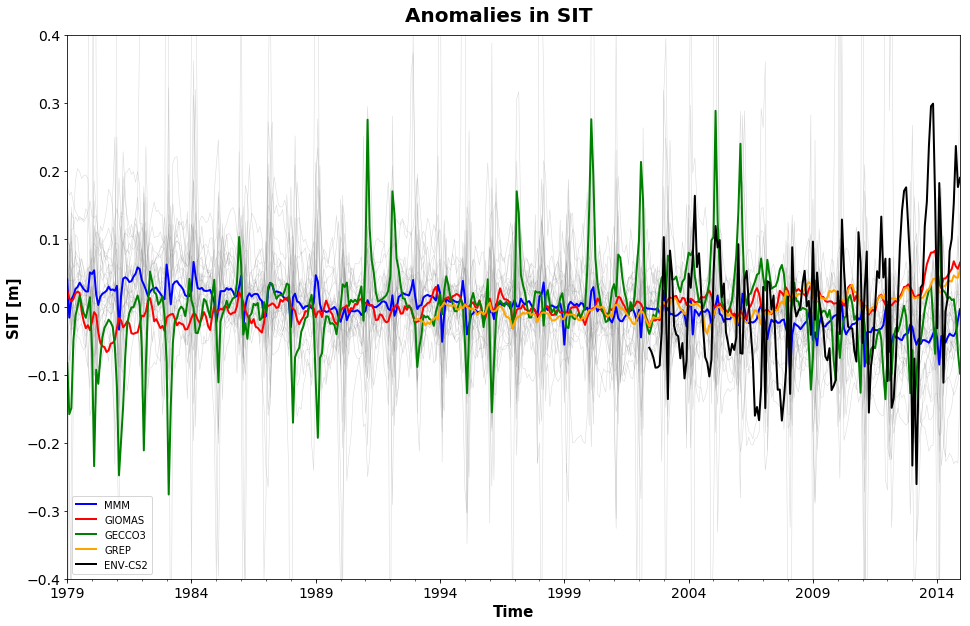

In [580]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

ax.set_ylim(-0.4,0.4)

fig.suptitle("Anomalies in SIT", fontweight ='bold',fontsize=20, y=0.92)

Mod_SIT_Anom_list.plot(x="Time",kind="line",alpha=0.3,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

Mod_SIT_Anom_list.plot(x="Time", y=["MMM", "GIOMAS","GECCO3",'GREP','ENV-CS2'],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"green","orange","black"],ax=ax)

#plt.legend(['Models','Observation'])
ax.set_ylabel('SIT [m]',fontsize=15,fontweight ='bold')
ax.set_xlabel('Time',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.savefig('SIT_Obs-MMM_Anomaly_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

## Probability distribution 

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


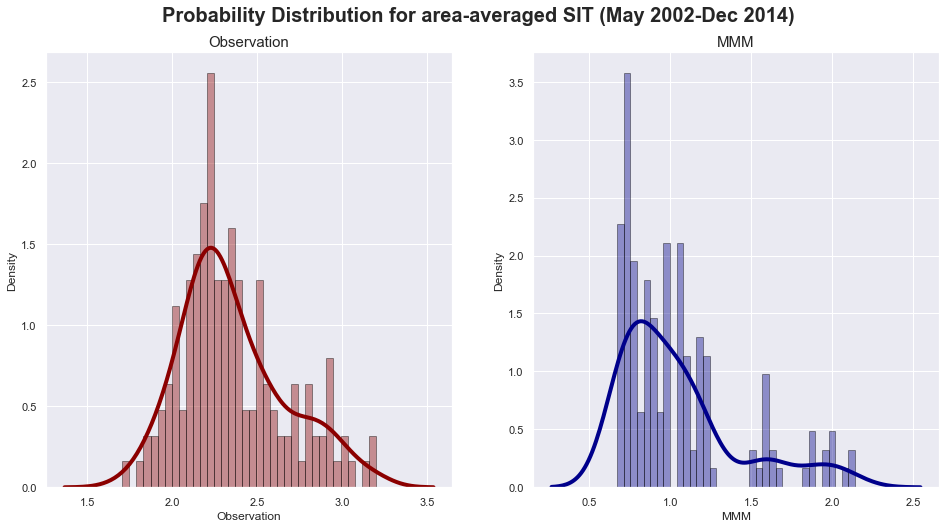

In [209]:
#Probability distribution function for Observation: 

fig, (axes) = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Probability Distribution for area-averaged SIT (May 2002-Dec 2014)", fontweight ='bold',fontsize=20, y=0.96)

#Observations:

ax1 = axes[0]

sns.distplot(MultiModel_Avg_list['Observation'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'}, ax=ax1,
             kde_kws={'linewidth': 4})

ax2 = axes[1]

sns.distplot(MultiModel_Avg_list['MMM'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, ax=ax2,
             kde_kws={'linewidth': 4})

ax1.set_title("Observation",fontsize=15)
ax2.set_title("MMM",fontsize=15)

# plt.savefig('PD_AreaAvg.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


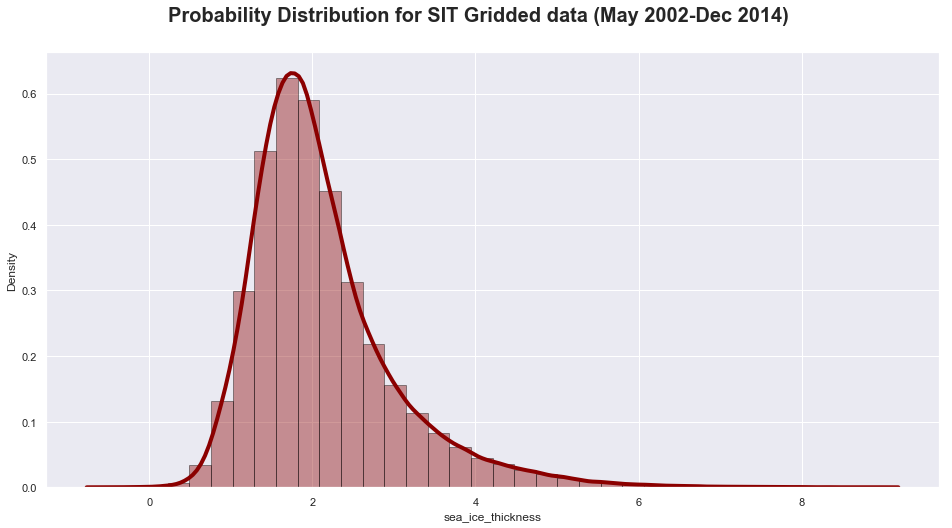

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

fig.suptitle("Probability Distribution for SIT Gridded data (May 2002-Dec 2014)", fontweight ='bold',fontsize=20, y=0.96)

#Observations:
sns.distplot(sit_Obs_Regridded, hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})

# plt.savefig('PD_AllGrids.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [156]:
x = sit_Obs_Regridded.sel(time=sit_Obs_Regridded.time.dt.month.isin([4])).mean(dim='time') #SIT
y = (SIC_Obs_Regridded.sel(time=SIC_Obs_Regridded.time.dt.month.isin([4])).mean(dim='time'))*100 #SIC

valid = (y.values.ravel()>=0) & (x.values.ravel()>=0)
x_valid = x.values.ravel()[valid]
y_valid = y.values.ravel()[valid]

In [157]:
m, b, r_value, p_value, std_err = scipy.stats.linregress(x_valid,y_valid)

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


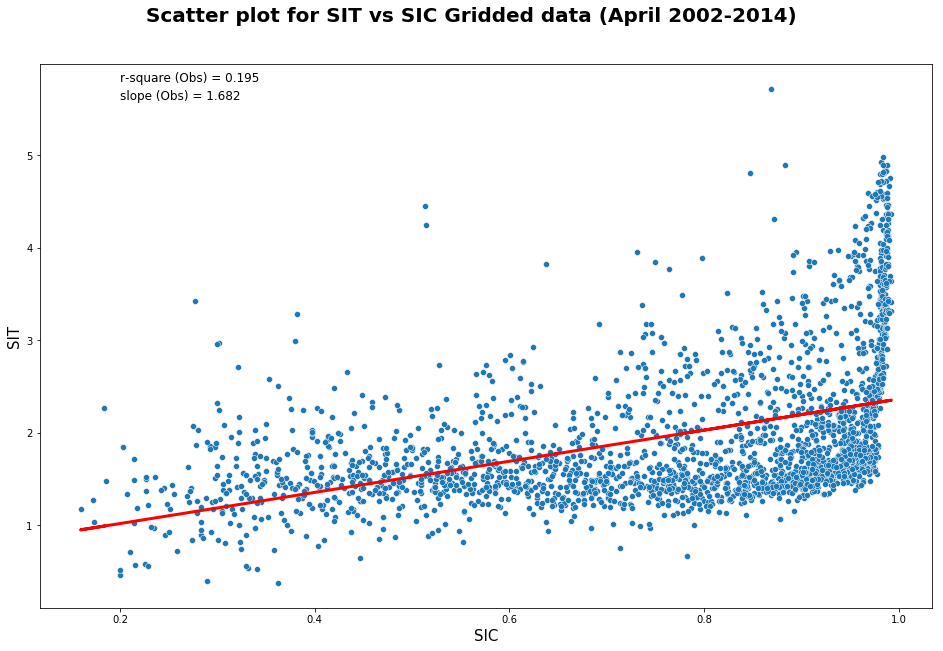

In [194]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

fig.suptitle("Scatter plot for SIT vs SIC Gridded data (April 2002-2014)", fontweight ='bold',fontsize=20, y=0.96)

y = sit_Obs_Regridded.sel(time=sit_Obs_Regridded.time.dt.month.isin([4])).mean(dim='time') #SIT
x = SIC_Obs_Regridded.sel(time=SIC_Obs_Regridded.time.dt.month.isin([4])).mean(dim='time') #SIC

valid = (x.values.ravel()>=0) & (y.values.ravel()>=0)
x_valid = x.values.ravel()[valid]
y_valid = y.values.ravel()[valid]

sns.scatterplot(x_valid, y_valid,ax=ax)

# finding best-fit curve
m, b, r_value, p_value, std_err = scipy.stats.linregress(x_valid,y_valid)


#add linear regression line to scatterplot 
ax.plot(x_valid, m*x_valid+b,color='red',linewidth=3)

#annotate the r-sq and slope value:
ax.annotate("r-square (Obs) = {:.3f}".format(r_value**2), (.2, 5.8), fontsize=12)
ax.annotate("slope (Obs) = {:.3f}".format(m), (.2, 5.6), fontsize=12)


ax.set_xlabel("SIC",fontsize=15)
ax.set_ylabel("SIT",fontsize=15)

# plt.savefig('Scatterplot_Gridcell_April.pdf',dpi=300, bbox_inches='tight')

plt.show()

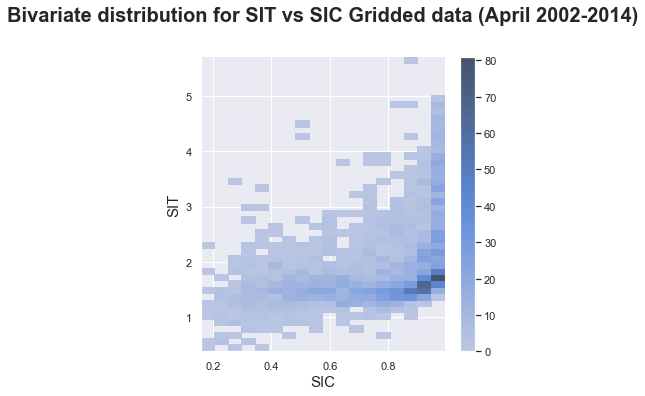

In [232]:
# fig.suptitle("Scatter plot for SIT vs SIC Gridded data (April 2002-2014)", fontweight ='bold',fontsize=20, y=0.96)

y = sit_Obs_Regridded.sel(time=sit_Obs_Regridded.time.dt.month.isin([4])).mean(dim='time') #SIT
x = SIC_Obs_Regridded.sel(time=SIC_Obs_Regridded.time.dt.month.isin([4])).mean(dim='time') #SIC

valid = (x.values.ravel()>=0) & (y.values.ravel()>=0)
x_valid = x.values.ravel()[valid]
y_valid = y.values.ravel()[valid]

sns.displot(x = x_valid, y = y_valid,cbar=True)

plt.xlabel("SIC",fontsize=15)
plt.ylabel("SIT",fontsize=15)

plt.title("Bivariate distribution for SIT vs SIC Gridded data (April 2002-2014)", fontweight ='bold',fontsize=20,y=1.1)

plt.savefig('displot_Gridcell_April.pdf',dpi=300, bbox_inches='tight')

plt.show()

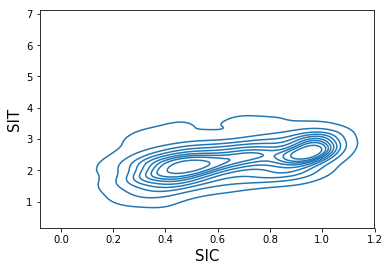

In [73]:
y = sit_Obs_Regridded.sel(time=sit_Obs_Regridded.time.dt.month.isin([1])).mean(dim='time') #SIT
x = SIC_Obs_Regridded.sel(time=SIC_Obs_Regridded.time.dt.month.isin([1])).mean(dim='time') #SIC

valid = (x.values.ravel()>=0) & (y.values.ravel()>=0)
x_valid = x.values.ravel()[valid]
y_valid = y.values.ravel()[valid]

sns.kdeplot(x = x_valid, y = y_valid)

plt.xlabel("SIC",fontsize=15)
plt.ylabel("SIT",fontsize=15)

# plt.title("Bivariate distribution for SIT vs SIC Gridded data (April 2002-2014)", fontweight ='bold',fontsize=20,y=1.1)

plt.show()

In [83]:
def Bivariate_Dist(SIT,SIC,month,ax):    
    y = SIT.sel(time=SIT.time.dt.month.isin([month])).mean(dim='time') #SIT
    x = SIC.sel(time=SIC.time.dt.month.isin([month])).mean(dim='time') #SIC  
    valid = (x.values.ravel()>=0) & (y.values.ravel()>=0)
    x_valid = x.values.ravel()[valid]
    y_valid = y.values.ravel()[valid]
    BD = sns.kdeplot(x = x_valid, y = y_valid,ax=ax)
    plt.xlabel("SIC",fontsize=15)
    plt.ylabel("SIT",fontsize=15)
    plt.title(month)
    return(BD)

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


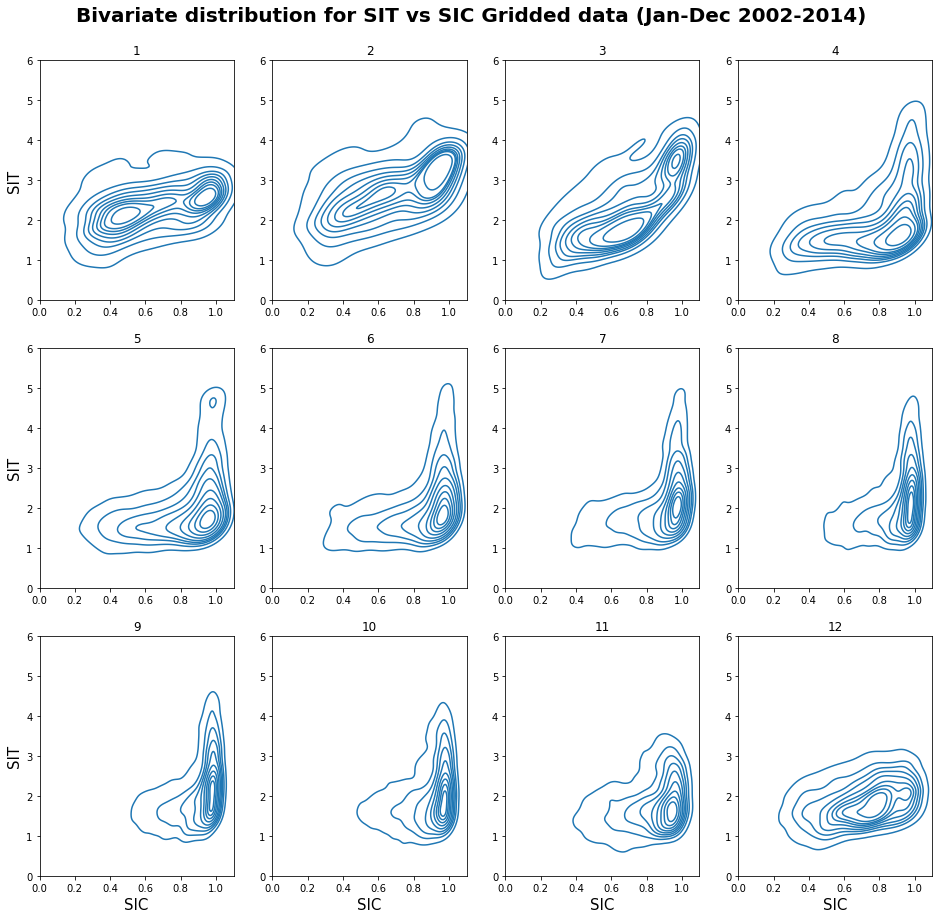

In [93]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(sit_Obs_Regridded,SIC_Obs_Regridded,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 6))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC Gridded data (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


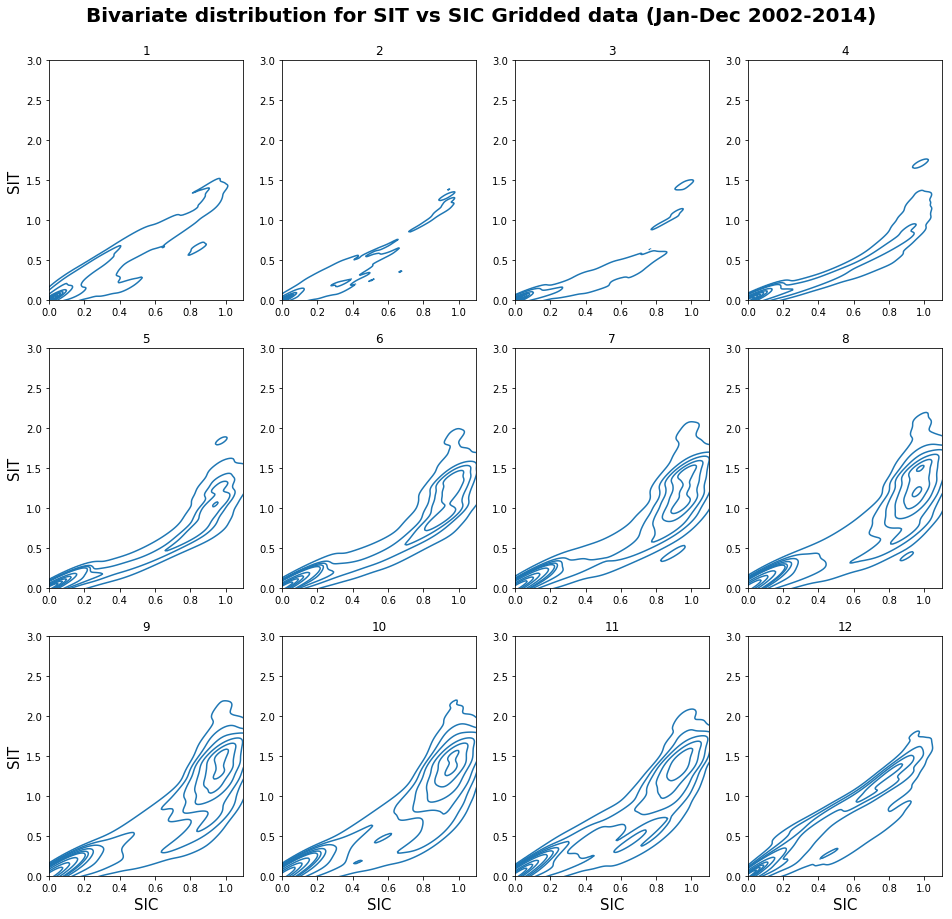

In [86]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(GIOMAS_SIT,SIC_Reanan,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 3))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC Gridded data (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
# plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


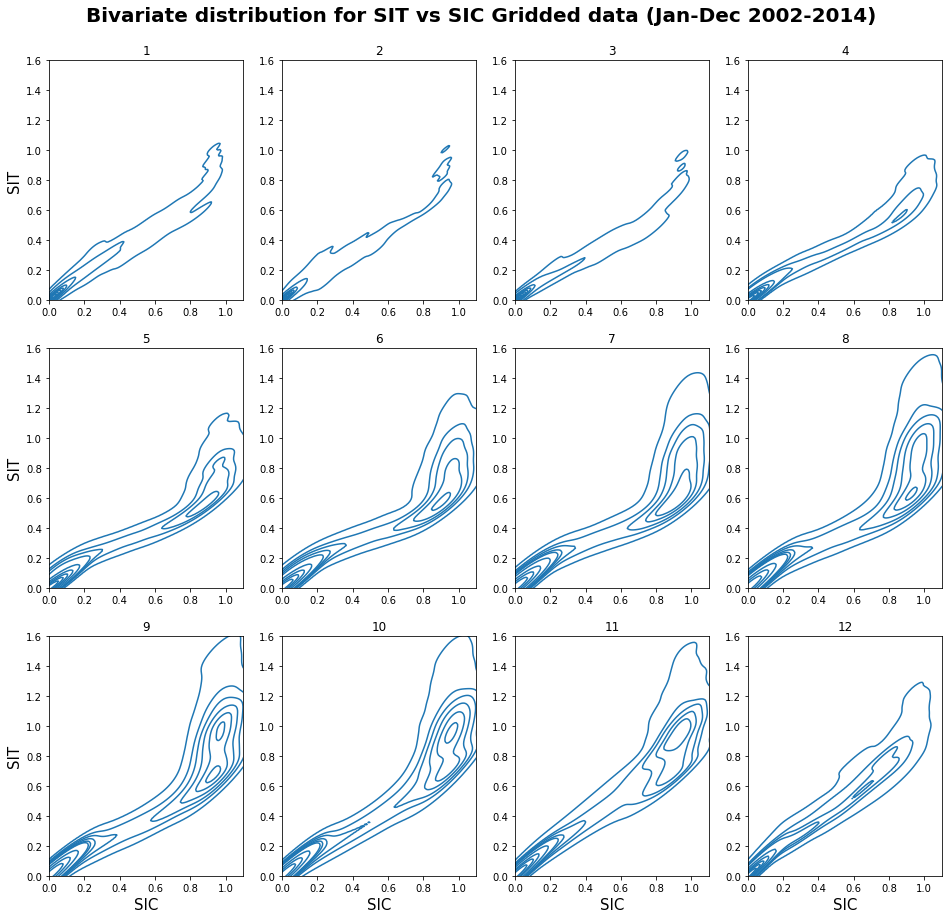

In [93]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(GREP_SIT,SIC_Reanan1,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 1.6))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC Gridded data (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
# plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


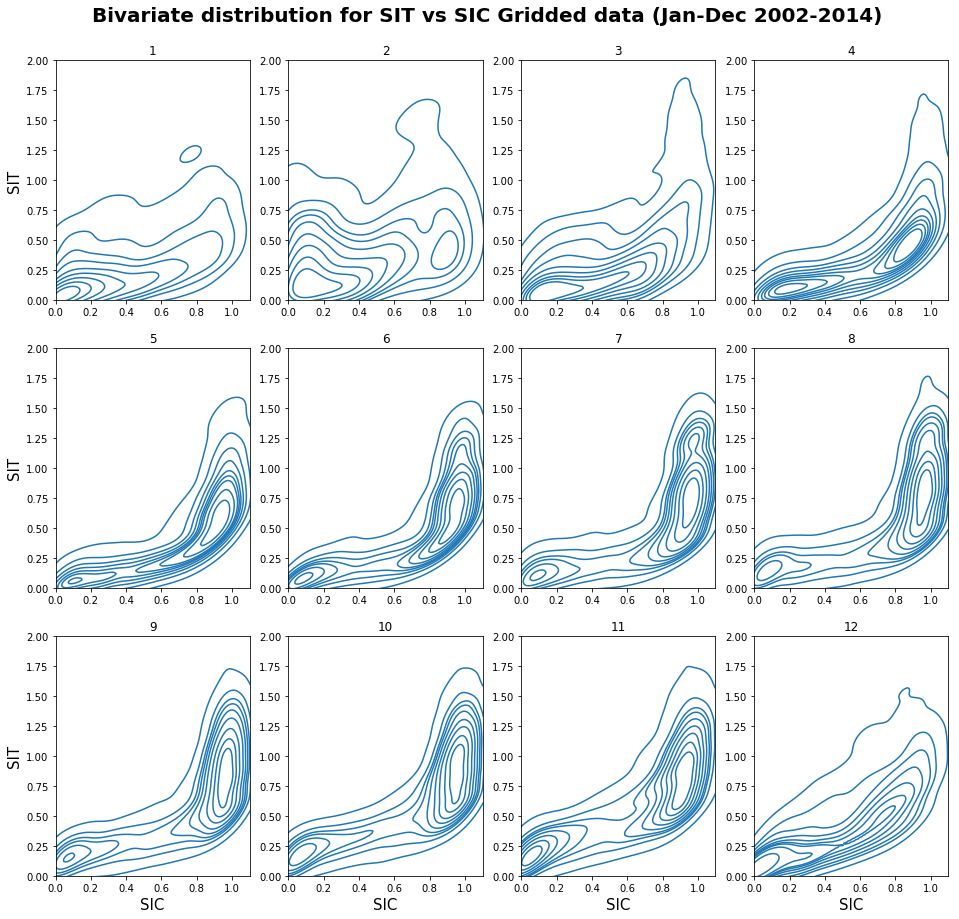

In [92]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(GECCO_SIT,SIC_Reanan,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 2))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC Gridded data (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
# plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


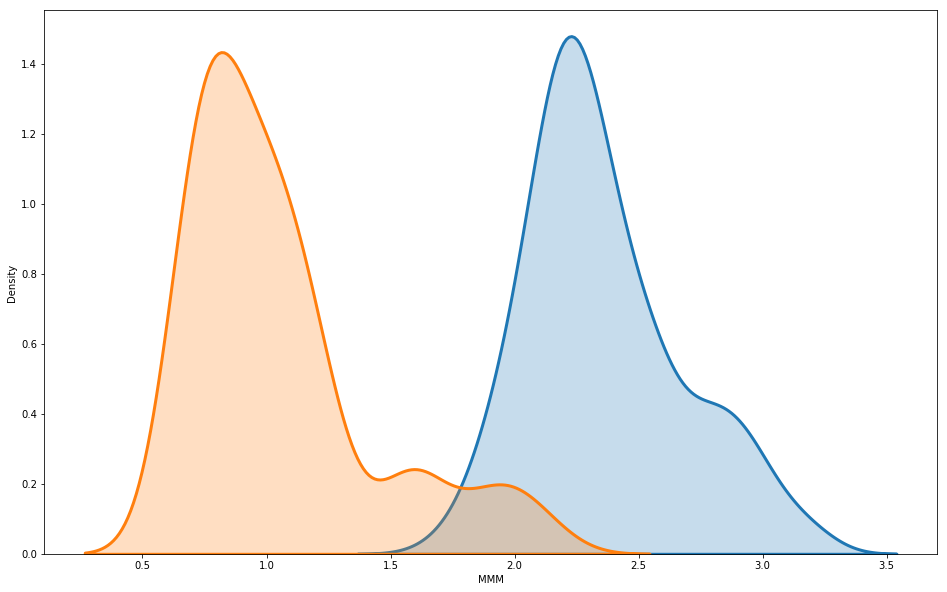

In [35]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))
sns.distplot(MultiModel_Avg_list['Observation'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label="OBS",ax=ax)
sns.distplot(MultiModel_Avg_list['MMM'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label="MMM",ax=ax)

## Scatter plot for clusters:

In [47]:
import plotly.express as px

In [48]:
# Sep-Feb:
diff_Sep_Feb = Mod_RN_ACycle_list[1:].diff(periods=7,axis=0)[8:9].iloc[:,1:30]

In [50]:
Cluster_DF = pd.DataFrame(diff_Sep_Feb.values.transpose(),columns = ['Sep_Feb'])
Cluster_DF.insert(0,'Models', Mod_RN_ACycle_list.columns[1:30])

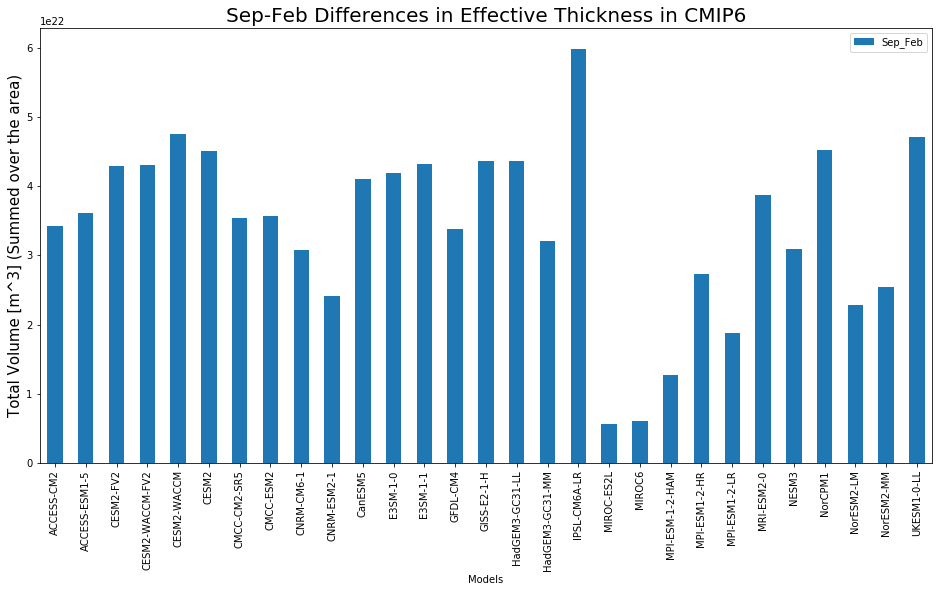

In [77]:
Cluster_DF.plot(x='Models',kind='bar',figsize=(16,8))
plt.title("Sep-Feb Differences in Effective Thickness in CMIP6",fontsize=20)
plt.ylabel("Total Volume [m^3] (Summed over the area)",fontsize=15)

plt.savefig('Sep-Feb_Differences_CMIP6.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [35]:
Cluster_DF['dMNF/dONS'] = Cluster_DF['Sep_Feb']/Cluster_DF.loc[35][2]

In [221]:
# # fig.set_xlim(-3, 4.5)
# # fig.set_ylim(-2, 3)

# y  =  Cluster_DF['dMMF/dOMF']
# x  =  Cluster_DF['dMNS/dONS']

# # y1  =  Cluster_DF.iloc[[0,1,2,3,4,5,6,7,8,21,32,33,34],:]['May_Feb']
# # x1  =  Cluster_DF.iloc[[0,1,2,3,4,5,6,7,8,21,32,33,34],:]['Nov_Sep']

# fig = px.scatter(x,y, size_max=100,text=Cluster_DF['Models'])
# # fig = px.scatter(x1,y1, size_max=100)

# fig.update_traces(textposition='top center')
# fig.update_layout(title_text='SIT', title_x=0.5)

# fig.show()

In [222]:
fig, ax1 = plt.subplots(1,1, figsize=(16, 10))

fig.suptitle("Scatter plots for seasonal differences", fontweight ='bold',fontsize=20, y=0.95)

ax1.set_xlim(-3, 4.5)
ax1.set_ylim(-2, 3)

x  =  Cluster_DF['dMMF/dOMF']
y  =  Cluster_DF['dMNS/dONS']

sns.scatterplot('dMMF/dOMF','dMNS/dONS', data=Cluster_DF, hue = 'Models', s=70, alpha=1.0,
                palette="pastel",ax=ax1)

# for i, txt in enumerate(Cluster_DF['Models']):
#     ax1.annotate(txt, (x[i], y[i]))

#Low Bias-Models:
# x1  =  Cluster_DF.iloc[[0,1,2,3,4,5,6,7,21,32,33,34],:]['dMMF/dOMF'] 
# y1  =  Cluster_DF.iloc[[0,1,2,3,4,5,6,7,21,32,33,34],:]['dMNS/dONS']

# #Positive trends in both seasons - models:
# x11  =  Cluster_DF.iloc[[2,10,12,19,24,29],:]['dMMF/dOMF']
# y11 =  Cluster_DF.iloc[[2,10,12,19,24,29],:]['dMNS/dONS']

# ax1.scatter(x1, y1,color='red',edgecolor = 'red',s=70)
# ax1.scatter(x11, y11,facecolors='none',edgecolor = 'black',s=100,linewidth=3)

circle = plt.Circle((1, 1), 1.5, fill = False, color='black',linewidth=2)
ax1.add_patch(circle)


ax1.set_xlabel('May-Feb '+'$[dM_{SIT}$'+'/'+'$dO_{SIT}$]',fontsize=15)
ax1.set_ylabel('Nov-Sep '+'$[dM_{SIT}$'+'/'+'$dO_{SIT}$]',fontsize=15)

ax1.set_title('Cirrcumpolar SIT',fontsize=20)

# ax1.get_legend().remove()
ax1.axhline(y = 1, color='black')
ax1.axvline(x = 1, color='black')

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=6)

# plt.savefig('Clusters_for_Model_Selection_circumpolar1.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



### Inter-quartile ranges:

In [ ]:
Q75_Obs_list =[]
Q25_Obs_list =[]
Q50_Obs_list =[]

for i in range(1,13):
    mon_list = MultiModel_Avg_list[(MultiModel_Avg_list['Time'].dt.month == i)]
    Q75 = np.percentile(mon_list['Observation'],75)
    Q25 = np.percentile(mon_list['Observation'],25)
    Q50 = np.percentile(mon_list['Observation'],50)
    
    
    Q75_Obs_list.append(Q75)
    Q25_Obs_list.append(Q25)
    Q50_Obs_list.append(Q50)

In [ ]:
MultiModel_ClimMean['75Q_OBS'] = Q75_Obs_list
MultiModel_ClimMean['25Q_OBS'] = Q25_Obs_list
MultiModel_ClimMean['50Q_OBS'] = Q50_Obs_list

MultiModel_ClimMean['Q25'] = np.percentile(MultiModel_ClimMean.iloc[:, 1:30],25,axis=1)
MultiModel_ClimMean['Q50'] = np.percentile(MultiModel_ClimMean.iloc[:, 1:30],50,axis=1)
MultiModel_ClimMean['Q75'] = np.percentile(MultiModel_ClimMean.iloc[:, 1:30],75,axis=1)

## Scatter plot: SIT-SIC Relationship:

In [130]:
import matplotlib.cm as cm
from sklearn.metrics import r2_score
import scipy.stats

In [148]:
#SIC Averages for models:

MultiModel_Avg_SIC = pd.DataFrame(
    {'Time': time,
     ds_sic_1.attrs['source_id']: clim_anom_sic(ds_sic_1)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_2.attrs['source_id']: clim_anom_sic(ds_sic_2)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_3.attrs['source_id']: clim_anom_sic(ds_sic_3)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_4.attrs['source_id']: clim_anom_sic(ds_sic_4)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_5.attrs['source_id']: clim_anom_sic(ds_sic_5)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_6.attrs['source_id']: clim_anom_sic(ds_sic_6)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_7.attrs['source_id']: clim_anom_sic(ds_sic_7)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_8.attrs['source_id']: clim_anom_sic(ds_sic_8)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_9.attrs['source_id']: clim_anom_sic(ds_sic_9)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_10.attrs['source_id']: clim_anom_sic(ds_sic_10)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_11.attrs['source_id']: clim_anom_sic(ds_sic_11)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_12.attrs['source_id']: clim_anom_sic(ds_sic_12)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_13.attrs['source_id']: clim_anom_sic(ds_sic_13)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_14.attrs['source_id']: clim_anom_sic(ds_sic_14)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_15.attrs['source_id']: clim_anom_sic(ds_sic_15)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_16.attrs['source_id']: clim_anom_sic(ds_sic_16)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_17.attrs['source_id']: clim_anom_sic(ds_sic_17)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_18.attrs['source_id']: clim_anom_sic(ds_sic_18)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_19.attrs['source_id']: clim_anom_sic(ds_sic_19)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_20.attrs['source_id']: clim_anom_sic(ds_sic_20)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_21.attrs['source_id']: clim_anom_sic(ds_sic_21)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_22.attrs['source_id']: clim_anom_sic(ds_sic_22)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_23.attrs['source_id']: clim_anom_sic(ds_sic_23)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_24.attrs['source_id']: clim_anom_sic(ds_sic_24)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_25.attrs['source_id']: clim_anom_sic(ds_sic_25)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_26.attrs['source_id']: clim_anom_sic(ds_sic_26)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_27.attrs['source_id']: clim_anom_sic(ds_sic_27)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_28.attrs['source_id']: clim_anom_sic(ds_sic_28)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_29.attrs['source_id']: clim_anom_sic(ds_sic_29)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_30.attrs['source_id']: clim_anom_sic(ds_sic_30)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_31.attrs['source_id']: clim_anom_sic(ds_sic_31)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_32.attrs['source_id']: clim_anom_sic(ds_sic_32)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_33.attrs['source_id']: clim_anom_sic(ds_sic_33)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_34.attrs['source_id']: clim_anom_sic(ds_sic_34)[2].mean(dim=['ni','nj'],skipna=True),
     ds_sic_35.attrs['source_id']: clim_anom_sic(ds_sic_35)[2].mean(dim=['ni','nj'],skipna=True),
     'Observation': (sic_Obs.mean(dim=['xc','yc'],skipna=True))*100,
                                  })                                             

In [149]:
MultiModel_Avg_SIC['MMM'] = MultiModel_Avg_SIC.iloc[:, 1:36].mean(axis=1)

### Second, making dataframes for monthly averages over all the timesteps:

In [68]:
def Mod_Vols_RN_Avg(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('1979-01-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('1979-01-01','2015-01-01'))*Area))/100).weighted(Area.fillna(0)).sum(dim=['ni','nj'],skipna=True)
    return(Volume)

In [69]:
# Dataframe for SIT Averages:

# excluded are the models with extreme values:

Mod_RN_Avg_list = pd.DataFrame(
    {'Time': GIOMAS_SIT.time,
     ds_sic_1.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_1,ds_sit_1,wgt_gc_models),
     ds_sic_2.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_2,ds_sit_2,wgt_gc_models),
     ds_sic_3.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_3,ds_sit_3,wgt_gc_models),
     ds_sic_4.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_4,ds_sit_4,wgt_gc_models),
     ds_sic_5.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_5,ds_sit_5,wgt_gc_models),
     ds_sic_6.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_6,ds_sit_6,wgt_gc_models),
     ds_sic_7.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_7,ds_sit_7,wgt_gc_models),
     ds_sic_8.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_8,ds_sit_8,wgt_gc_models),
     ds_sic_9.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_9,ds_sit_9,wgt_gc_models),
     ds_sic_10.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_10,ds_sit_10,wgt_gc_models),
     ds_sic_11.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_11,ds_sit_11,wgt_gc_models),
     ds_sic_12.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_12,ds_sit_12,wgt_gc_models),
#      ds_sic_13.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_13,ds_sit_13,wgt_gc_models),
     ds_sic_14.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_14,ds_sit_14,wgt_gc_models),
#      ds_sic_15.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_15,ds_sit_15,wgt_gc_models),
#      ds_sic_16.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_16,ds_sit_16,wgt_gc_models),
#      ds_sic_17.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_17,ds_sit_17,wgt_gc_models),
#      ds_sic_18.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_18,ds_sit_18,wgt_gc_models),
#      ds_sic_19.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_19,ds_sit_19,wgt_gc_models),
     ds_sic_20.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_20,ds_sit_20,wgt_gc_models),
     ds_sic_21.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_21,ds_sit_21,wgt_gc_models),
     ds_sic_22.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_22,ds_sit_22,wgt_gc_models),
     ds_sic_23.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_23,ds_sit_23,wgt_gc_models),
     ds_sic_24.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_24,ds_sit_24,wgt_gc_models),
     ds_sic_25.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_25,ds_sit_25,wgt_gc_models),
     ds_sic_26.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_26,ds_sit_26,wgt_gc_models),
     ds_sic_27.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_27,ds_sit_27,wgt_gc_models),
     ds_sic_28.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_28,ds_sit_28,wgt_gc_models),
     ds_sic_29.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_29,ds_sit_29,wgt_gc_models),
     ds_sic_30.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_30,ds_sit_30,wgt_gc_models),
     ds_sic_31.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_31,ds_sit_31,wgt_gc_models),
     ds_sic_32.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_32,ds_sit_32,wgt_gc_models),
     ds_sic_33.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_33,ds_sit_33,wgt_gc_models),
     ds_sic_34.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_34,ds_sit_34,wgt_gc_models),
     ds_sic_35.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_35,ds_sit_35,wgt_gc_models),
     'GIOMAS': (SIC_Reanan*GIOMAS_SIT*wgt_gc_models).weighted(wgt_gc_models.fillna(0)).sum(dim=['ni','nj'],
                                                                                            skipna=True),
     'GECCO3': (SIC_Reanan*GECCO_SIT*wgt_gc_models).weighted(wgt_gc_models.fillna(0)).sum(dim=['ni','nj'],
                                                                                           skipna=True),
#      'GREP'  : ((((GREP_SIT*wgt_gc_models*SIC_Reanan1.mean(dim=
#                             "time"))).weighted(wgt_gc_models.fillna(0))).mean(dim=('ni','nj'),skipna=True)),
                                  })                                                            

In [70]:
Mod_RN_Avg_list['MMM'] = Mod_RN_Avg_list.iloc[:, 1:30].mean(axis=1)

In [71]:
df = pd.DataFrame(
    {'Time': GREP_SIT.time,
     'GREP'  : ((((GREP_SIT*wgt_gc_models*SIC_Reanan1.mean(dim=
                            "time"))).weighted(wgt_gc_models.fillna(0))).sum(dim=('ni','nj'),skipna=True)),
                                  })   

In [72]:
df1 = pd.DataFrame(
    {'Time': sit_Obs_Regridded.time,
     'ENV-CS2'  : (sit_Obs_Regridded*SIC_Obs_Regridded*wgt_gc_models).weighted(wgt_gc_models.fillna(0)).sum(dim=
                                                                                            ('ni','nj'),skipna=True),
                                  })   

## Selection of Advance-Retreat seasons:

In [150]:
Adv_SIT = MultiModel_Avg_list[(MultiModel_Avg_list['Time'].dt.month == 3) |(MultiModel_Avg_list['Time'].dt.month == 4) | (MultiModel_Avg_list['Time'].dt.month==5)
               | (MultiModel_Avg_list['Time'].dt.month==6) | (MultiModel_Avg_list['Time'].dt.month==7) | (MultiModel_Avg_list['Time'].dt.month==8)]

Ret_SIT = MultiModel_Avg_list[(MultiModel_Avg_list['Time'].dt.month == 10) | (MultiModel_Avg_list['Time'].dt.month==11)
               | (MultiModel_Avg_list['Time'].dt.month==12)|(MultiModel_Avg_list['Time'].dt.month == 1)|(MultiModel_Avg_list['Time'].dt.month == 2)]


Adv_SIC = MultiModel_Avg_SIC[(MultiModel_Avg_SIC['Time'].dt.month == 3) |(MultiModel_Avg_SIC['Time'].dt.month == 4) | (MultiModel_Avg_SIC['Time'].dt.month==5)
               | (MultiModel_Avg_SIC['Time'].dt.month==6) | (MultiModel_Avg_SIC['Time'].dt.month==7) | (MultiModel_Avg_SIC['Time'].dt.month==8)]

Ret_SIC = MultiModel_Avg_SIC[(MultiModel_Avg_SIC['Time'].dt.month == 10) | (MultiModel_Avg_SIC['Time'].dt.month==11)
               | (MultiModel_Avg_SIC['Time'].dt.month==12)|(MultiModel_Avg_SIC['Time'].dt.month == 1)|(MultiModel_Avg_list['Time'].dt.month == 2)]

In [151]:
# Put the SIT and SIC together in one dataframe
# Advance Season: 

a_AS = pd.melt(Adv_SIT.iloc[:, 0:37], id_vars =['Time'])
b_AS = pd.melt(Adv_SIC.iloc [:, 0:37], id_vars =['Time'])

a_AS = a_AS.rename(columns={'variable': 'Models', 'value': 'SIT'})
a_AS['SIC'] = b_AS['value']

#Retreat Season:

a_RS = pd.melt(Ret_SIT.iloc[:, 0:37], id_vars =['Time'])
b_RS = pd.melt(Ret_SIC.iloc [:, 0:37], id_vars =['Time'])

a_RS = a_RS.rename(columns={'variable': 'Models', 'value': 'SIT'})
a_RS['SIC'] = b_RS['value']

In [179]:
fig, (axes) = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Cirrcumpolar: Scatter Plot", fontweight ='bold',fontsize=20, y=0.96)

#Advance:

ax1 = axes[0]
ax1.set_ylim(0, 5)

x  = Adv_SIC['Observation']
y  = Adv_SIT['Observation']
x1 = Adv_SIC['MMM']
y1 = Adv_SIT['MMM']

# Obtain m (slope) and b(intercept) of linear regression line:

#Observation:
m, b, r_value, p_value, std_err = scipy.stats.linregress(x,y)

#MMM:
m1, b1, r_value1, p_value1, std_err1 = scipy.stats.linregress(x1,y1)

#Add scatterplot:
sns.scatterplot('SIC','SIT', data=a_AS, hue = 'Models',alpha=0.5,palette="ch:s=.25,rot=-.25",legend = False,ax=ax1)
sns.scatterplot(x,y, color='red',edgecolor = 'red',ax=ax1)

#add linear regression line to scatterplot 
ax1.plot(x, m*x+b,color='black',linestyle= "dashed",linewidth=3)
ax1.plot(x1, m1*x1+b1,color='red',linewidth=3)

#annotate the r-sq and slope value:
ax1.annotate("r-square (MMM) = {:.3f}".format(r_value1**2), (32, 4.8), fontsize=12)
ax1.annotate("slope (MMM) = {:.3f}".format(m1), (32, 4.6), fontsize=12)
ax1.annotate("r-square (Obs) = {:.3f}".format(r_value**2), (5, 4.8), fontsize=12)
ax1.annotate("slope (Obs) = {:.3f}".format(m), (5, 4.6), fontsize=12)

ax1.set_xlabel('Sea-ice Concentration (%)',fontsize=15)
ax1.set_ylabel('Sea-ice Thickness (m)',fontsize=15)
ax1.set_title('Advance Season (Mar-Aug)',fontsize=20)



#Retreat:

ax2 = axes[1]
ax2.set_ylim(0, 5)


x  = Ret_SIC['Observation']
y  = Ret_SIT['Observation']
x1 = Ret_SIC['MMM']
y1 = Ret_SIT['MMM']

# Obtain m (slope) and b(intercept) of linear regression line:

#Observation:
m, b, r_value, p_value, std_err = scipy.stats.linregress(x,y)

#MMM:
m1, b1, r_value1, p_value1, std_err1 = scipy.stats.linregress(x1,y1)

#Add scatterplot:
sns.scatterplot('SIC','SIT', data=a_RS, hue = 'Models',alpha=0.5,palette="ch:s=.25,rot=-.25",legend = False,ax=ax2)
sns.scatterplot(x,y, color='red',edgecolor = 'red',ax=ax2)

#add linear regression line to scatterplot 
ax2.plot(x, m*x+b,color='black',linestyle= "dashed",linewidth=3)
ax2.plot(x1, m1*x1+b1,color='red',linewidth=3)

#annotate the r-sq and slope value:
ax2.annotate("r-square (MMM) = {:.3f}".format(r_value1**2), (32, 4.8), fontsize=12)
ax2.annotate("slope (MMM) = {:.3f}".format(m1), (32, 4.6), fontsize=12)
ax2.annotate("r-square (Obs) = {:.3f}".format(r_value**2), (5, 4.8), fontsize=12)
ax2.annotate("slope (Obs) = {:.3f}".format(m), (5, 4.6), fontsize=12)


ax2.set_xlabel('Sea-ice Concentration (%)',fontsize=15)
ax2.set_ylabel('Sea-ice Thickness (m)',fontsize=15)
ax2.set_title('Retreat Season (Oct-Feb)',fontsize=20)

plt.savefig('Scatter_Plot_SIT-SIC_Cirrcumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

# Boxplots: 

In [73]:
Mod_RN_Avg_list['GREP'] = df.iloc[:, 1:2]
Mod_RN_Avg_list['ENV-CS2'] = df1.iloc[:, 1:2]

In [74]:
Mod_RN_Avg_list.iloc[:, 30:36]

GIOMAS        GECCO3           MMM          GREP       ENV-CS2
0    7.124046e+21  1.712312e+21  1.204221e+22  4.472955e+21  2.897378e+22
1    3.825252e+21  7.280000e+20  6.971217e+21  2.287997e+21  6.356272e+22
2    4.092829e+21  1.515853e+21  6.498609e+21  3.093298e+21  7.223885e+22
3    9.561837e+21  4.928663e+21  9.157961e+21  6.564701e+21  7.084665e+22
4    1.977032e+22  1.094041e+22  1.439119e+22  1.127718e+22  6.386313e+22
..            ...           ...           ...           ...           ...
427  5.239557e+22  3.079897e+22  2.995139e+22           NaN           NaN
428  5.742200e+22  3.502347e+22  3.450485e+22           NaN           NaN
429  5.457188e+22  3.367729e+22  3.601439e+22           NaN           NaN
430  4.413431e+22  2.422877e+22  3.182494e+22           NaN           NaN
431  2.540754e+22  9.706484e+21  2.043932e+22           NaN           NaN

[432 rows x 5 columns]

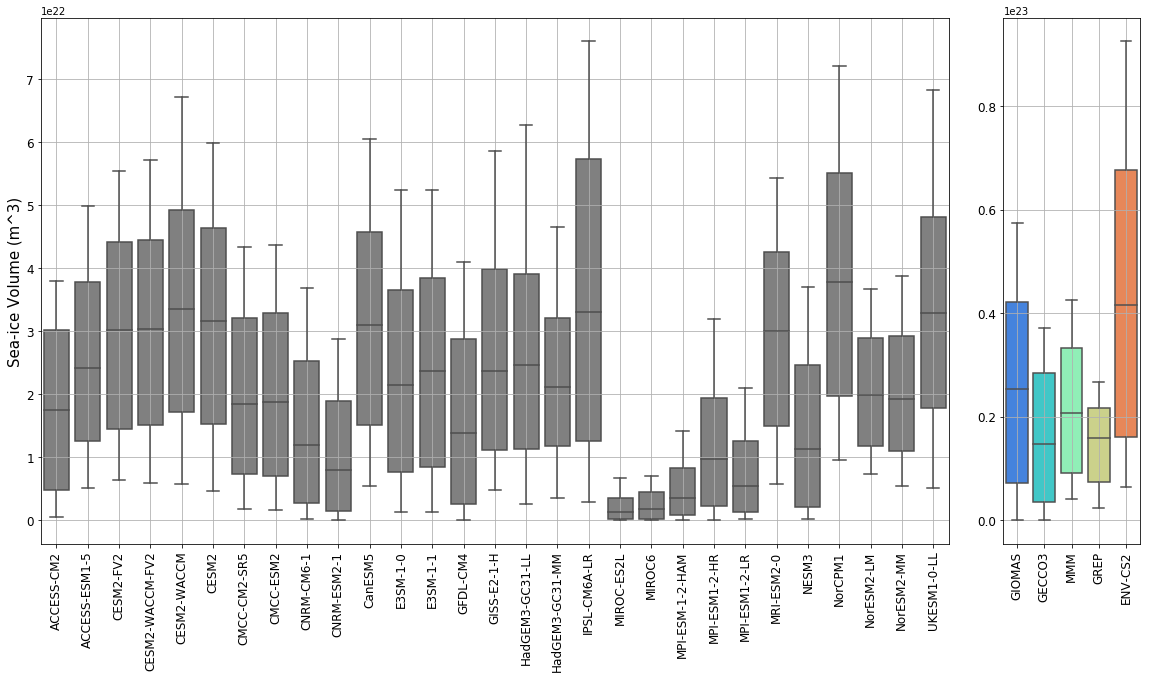

In [76]:
#Advance Season:

fig, (ax, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [10, 1.5]},figsize=(16,8))
# ax.set_ylim([0*10**22, 8*10**22])
# ax1.set_ylim([0*10**22, 8*10**22])
sns.boxplot(data=Mod_RN_Avg_list.iloc[:, 1:30],ax=ax, color="grey")
sns.boxplot(data=Mod_RN_Avg_list.iloc[:, 30:36],ax=ax1, palette = "rainbow")

fig.tight_layout()

ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)

ax.set_ylabel('Sea-ice Volume (m^3)',fontsize=15)
# ax.set_title('Advance Season (Mar-Aug)',fontsize=20)

ax.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='x', rotation=90 , labelsize=12)

ax.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax.grid(True)
ax1.grid(True)

plt.savefig('Boxplot_Circumpolar_All.pdf',dpi=300, bbox_inches='tight')

plt.show()


# Error Matrix:

In [59]:
Matrix_AllModels = Mod_RN_ACycle_list.iloc[:,1:30]

In [60]:
#absolute deviations of model values from observations:
# 1. GIOMAS:

Error_Matrix_Models_GIOMAS = abs(Matrix_AllModels.sub(Mod_RN_ACycle_list['GIOMAS'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_GIOMAS['Time'] = Mod_RN_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==1)]
Feb_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==2)]
Mar_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==3)]
Apr_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==4)]
May_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==5)]
Jun_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==6)]
Jul_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==7)]
Aug_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==8)]
Sep_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==9)]
Oct_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==10)]
Nov_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==11)]
Dec_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==12)]


# 2. GECCO3:

Error_Matrix_Models_GECCO3 = abs(Matrix_AllModels.sub(Mod_RN_ACycle_list['GECCO3'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_GECCO3['Time'] = Mod_RN_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==1)]
Feb_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==2)]
Mar_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==3)]
Apr_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==4)]
May_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==5)]
Jun_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==6)]
Jul_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==7)]
Aug_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==8)]
Sep_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==9)]
Oct_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==10)]
Nov_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==11)]
Dec_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==12)]


# 3. GREP:

Error_Matrix_Models_GREP = abs(Matrix_AllModels.sub(Mod_RN_ACycle_list['GREP'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_GREP['Time'] = Mod_RN_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==1)]
Feb_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==2)]
Mar_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==3)]
Apr_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==4)]
May_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==5)]
Jun_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==6)]
Jul_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==7)]
Aug_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==8)]
Sep_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==9)]
Oct_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==10)]
Nov_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==11)]
Dec_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==12)]



# 4. EV_CS2:

Error_Matrix_Models_EV_CS2 = abs(Matrix_AllModels.sub(Mod_EC2_ACycle_list['EV-CS2'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_EV_CS2['Time'] = Mod_EC2_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==1)]
Feb_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==2)]
Mar_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==3)]
Apr_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==4)]
May_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==5)]
Jun_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==6)]
Jul_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==7)]
Aug_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==8)]
Sep_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==9)]
Oct_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==10)]
Nov_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==11)]
Dec_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==12)]

In [61]:
#sum of absolute deviations of model values from observation

# ADDING all the absolute error means in one dataframe for plotting a matrix: 

MultiModel_Error_Matrix_GIOMAS = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
    })


MultiModel_Error_Matrix_GECCO3 = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
    })


MultiModel_Error_Matrix_GREP = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
    })


MultiModel_Error_Matrix_EV_CS2 = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
    })

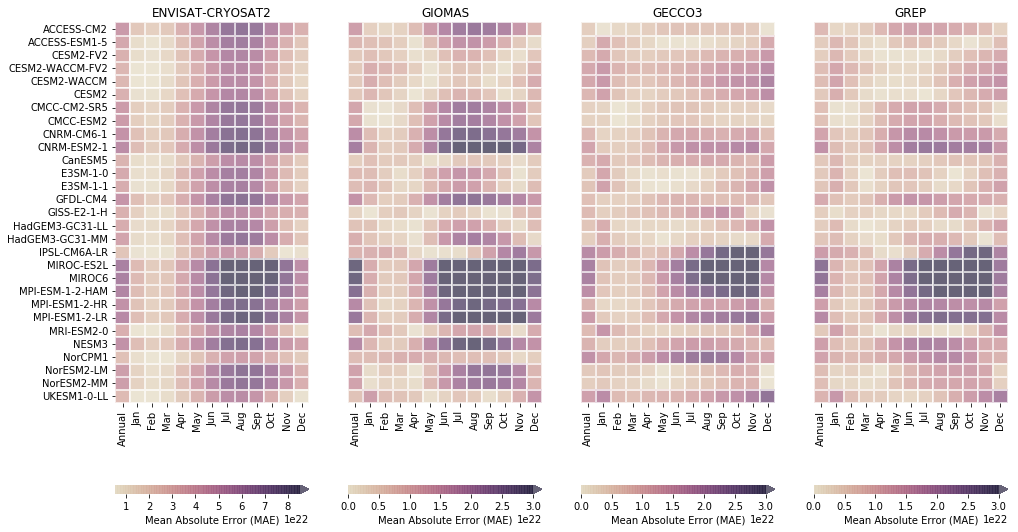

In [67]:
fig, (axes) = plt.subplots(1, 4, figsize=(16, 10))

cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
#cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

cbar_kws={"label":"Mean Absolute Error (MAE)","orientation":"horizontal","shrink":1,"extend":"max",
          'drawedges':False}


ax1 = axes[0]
sns.heatmap(MultiModel_Error_Matrix_EV_CS2.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,cmap=cmap,cbar_kws = cbar_kws,ax=ax1)
ax1.set_title("ENVISAT-CRYOSAT2")

ax2 = axes[1]
sns.heatmap(MultiModel_Error_Matrix_GIOMAS.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,cmap=cmap,vmin=0*10**22, vmax=3*10**22,cbar_kws = cbar_kws,ax=ax2)
ax2.set_yticks([])
ax2.set_title("GIOMAS")

ax3 = axes[2]
sns.heatmap(MultiModel_Error_Matrix_GECCO3.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,cmap=cmap,vmin=0*10**22, vmax=3*10**22,cbar_kws = cbar_kws,ax=ax3)
ax3.set_yticks([])
ax3.set_title("GECCO3")

ax4 = axes[3]
sns.heatmap(MultiModel_Error_Matrix_GREP.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,vmin=0*10**22, vmax=3*10**22,cmap=cmap,cbar_kws = cbar_kws,ax=ax4)
ax4.set_yticks([])
ax4.set_title("GREP")

# plt.xlabel("Time-Period",fontsize=16)
# ax1.set_ylabel("Model Names",fontsize=16)
# plt.title("Model Bias Matrix: Mean absolute deviation for SIT",fontsize=20)

# plt.tick_params(axis='x', labelsize=12)
# plt.tick_params(axis='y', labelsize=12)

plt.savefig('SIT_Obs_Models_ErrorMatrix_AAR.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [42]:
# fig = plt.subplots(1, 1, figsize=(16, 12))
# cmap = sns.light_palette("#3fdd01", as_cmap=True)
# cbar_kws={"label":"Mean Absolute Error (MAE)","orientation":"vertical","shrink":1,
#           'drawedges':False}

# sns.heatmap(MultiModel_Error_Matrix.iloc[:,1:6], annot=True, linewidth=1, linecolor='w', square=False, alpha=0.7,
#             robust=True,cmap=cmap,cbar_kws = cbar_kws)

# plt.xlabel("Time-Period",fontsize=15)
# plt.ylabel("Model Names",fontsize=15)
# plt.title("Model Bias Matrix: Mean absolute deviation for SIT",fontsize=20)
# #plt.yticks(values,x)

# #plt.savefig('SIT_Obs_Models_ErrorMatrix.pdf',dpi=300, bbox_inches='tight')

# plt.show()

# Linear Regressions for SIT:

In [233]:
slope, intercept, r_value, p_value, std_err = linregress(Feb.index, Feb['MMM'])
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 0.000418, intercept: -0.030413
R-squared: 0.002570


## Linear Regression for Multi-model and Observation Anomalies:

In [70]:
Mod_RN_Avg_list.fillna(0,inplace=True)

In [71]:
slope_list_monwise =[]
error_list_monwise =[]
AllMod_slope_list_monwise = []

for i in range(1,13):
    mon_list = Mod_RN_Avg_list[(Mod_RN_Avg_list['Time'].dt.month == i)]
    mon_lingress = mon_list.iloc[:,1:30].apply(lambda x: linregress(list(range(1,len(mon_list.iloc[:,1:30].index)+1)), x), 
                                                     result_type='expand').rename(index={0: 'slope', 1: 
                                                                                  'intercept', 2: 'rvalue', 3:
                                                                                  'p-value', 4:'stderr'})
    slope_list_monwise.append(mon_lingress.mean(axis=1)[0])
    error_list_monwise.append(mon_lingress.std(axis=1)[4])
    AllMod_slope_list_monwise.append(mon_lingress.iloc[0])

    
    
slope_list_GIOMAS =[]
error_list_GIOMAS =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i].index)+1)), 
                                                             Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i]['GIOMAS'])
    slope_list_GIOMAS.append(slope)
    error_list_GIOMAS.append(std_err)
    
    

slope_list_GECCO3 =[]
error_list_GECCO3 =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i].index)+1)), 
                                                             Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i]['GECCO3'])
    slope_list_GECCO3.append(slope)
    error_list_GECCO3.append(std_err)
    
    

    
slope_list_GREP =[]
error_list_GREP =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(df[df['Time'].dt.month == i].index)+1)), 
                                                             df[df['Time'].dt.month == i]['GREP'])
    slope_list_GREP.append(slope)
    error_list_GREP.append(std_err)
    
    
    
slope_list_EN_CS2 =[]
error_list_EN_CS2 =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(df1[df1['Time'].dt.month == i].index)+1)), 
                                                             df1[df1['Time'].dt.month == i]['ENV-CS2'])
    slope_list_EN_CS2.append(slope)
    error_list_EN_CS2.append(std_err)    


In [72]:
LinearReg_df = pd.DataFrame(
    {'MMM': slope_list_monwise,
#      'Error_MMM': error_list_monwise,
     'GIOMAS': slope_list_GIOMAS,
     'GECCO3': slope_list_GECCO3,
     'GREP': slope_list_GREP,
     'ENV-CS2': slope_list_EN_CS2,
#      'Error_GIOMAS': error_list_GIOMAS,
     'Months': list(calendar.month_abbr)[1:13],
    })


In [73]:
df_Annual_LR = pd.DataFrame(AllMod_slope_list_monwise)

df_Annual_LR['Months'] = list(calendar.month_abbr)[1:13]

In [74]:
Seasonal_df = pd.DataFrame(
    {'Advance': Adv_LR.iloc[0,:],
     'Retreat': Ret_LR.iloc[0,:],
    })

Seasonal_df = Seasonal_df.T
Seasonal_df['Seasons'] = [ 'Advance','Retreat']

NameError: name 'Adv_LR' is not defined

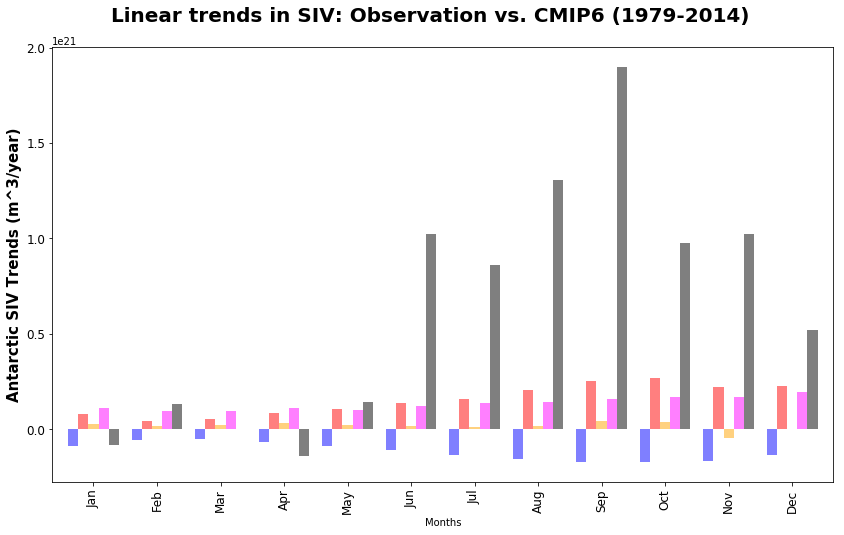

In [75]:
fig, ax1 = plt.subplots(1, 1,figsize=(14,8))

fig.suptitle("Linear trends in SIV: Observation vs. CMIP6 (1979-2014)", fontweight ='bold',fontsize=20, y=0.95)

# ax1.set_ylim(-0.05, 0.05)

LinearReg_df.plot(x="Months", y=["MMM","GIOMAS","GECCO3","GREP","ENV-CS2"],
                     kind="bar",width=0.8,alpha=0.5,
                     color=['blue','red','orange','magenta','black'], ax=ax1)
# df_Annual_LR.plot(x="Months",
#                      marker='.', linestyle='none',alpha=1.0,
#                      color=['black'], ax=ax1)
ax1.get_legend().remove()

ax1.set_ylabel('Antarctic SIV Trends (m^3/year)', fontweight ='bold',fontsize=15)


ax1.tick_params(axis='x', labelsize=12)
# ax2.tick_params(axis='x', labelsize=12)

ax1.tick_params(axis='y', labelsize=12)
# ax2.tick_params(axis='y', labelsize=12)

# plt.subplots_adjust(hspace=0.07)
# plt.tight_layout(h_pad=1.0)

# plt.savefig('SIT_Linear_Trends_Circumpolar_Ann_ARS.pdf',dpi=300, bbox_inches='tight')
plt.show()

In [171]:
test = Seasonal_df.iloc[:,0:35][(Seasonal_df.iloc[:,0:35] >0 )]

In [173]:
# To count the number of models showing positive or negative trends: 
# test.iloc[0:1,:].count(axis='rows') #Advance
# test.iloc[1:2,:].count(axis='rows') #Retreat
test.iloc[0:2,:].count(axis='rows') #Both

ACCESS-CM2           0
ACCESS-ESM1-5        0
CESM2-FV2            2
CESM2-WACCM-FV2      0
CESM2-WACCM          0
CESM2                0
CMCC-CM2-SR5         0
CMCC-ESM2            1
CNRM-CM6-1           1
CNRM-ESM2-1          0
CanESM5              2
E3SM-1-0             1
E3SM-1-1-ECA         2
E3SM-1-1             1
EC-Earth3-AerChem    1
EC-Earth3-CC         0
EC-Earth3-Veg-LR     1
EC-Earth3-Veg        1
EC-Earth3            1
GFDL-CM4             2
GISS-E2-1-H          1
HadGEM3-GC31-LL      0
HadGEM3-GC31-MM      0
IPSL-CM6A-LR         0
MIROC-ES2L           2
MIROC6               0
MPI-ESM-1-2-HAM      0
MPI-ESM1-2-HR        0
MPI-ESM1-2-LR        0
MRI-ESM2-0           2
NESM3                1
NorCPM1              1
NorESM2-LM           0
NorESM2-MM           0
UKESM1-0-LL          0
dtype: int64

# Spatial Trends:

In [12]:
#Filter observation data based on months in a particular season:
Obs_DJF = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([1,2,12]))
Obs_MAM = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([3,4,5]))
Obs_JJA = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([6,7,8]))
Obs_SON = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([9,10,11]))

In [ ]:
#Filter regridded observation data based on months in a particular season:

In [56]:
#Funstion for deliniating Advance and Retreat seasons:
def SpatialPlots_Mon(data,mon):
    month = data.sel(time=data.time.dt.month.isin([mon]))
    return(month)

In [13]:
Obs_Trend = linear_trend(sit_Obs, 'time')

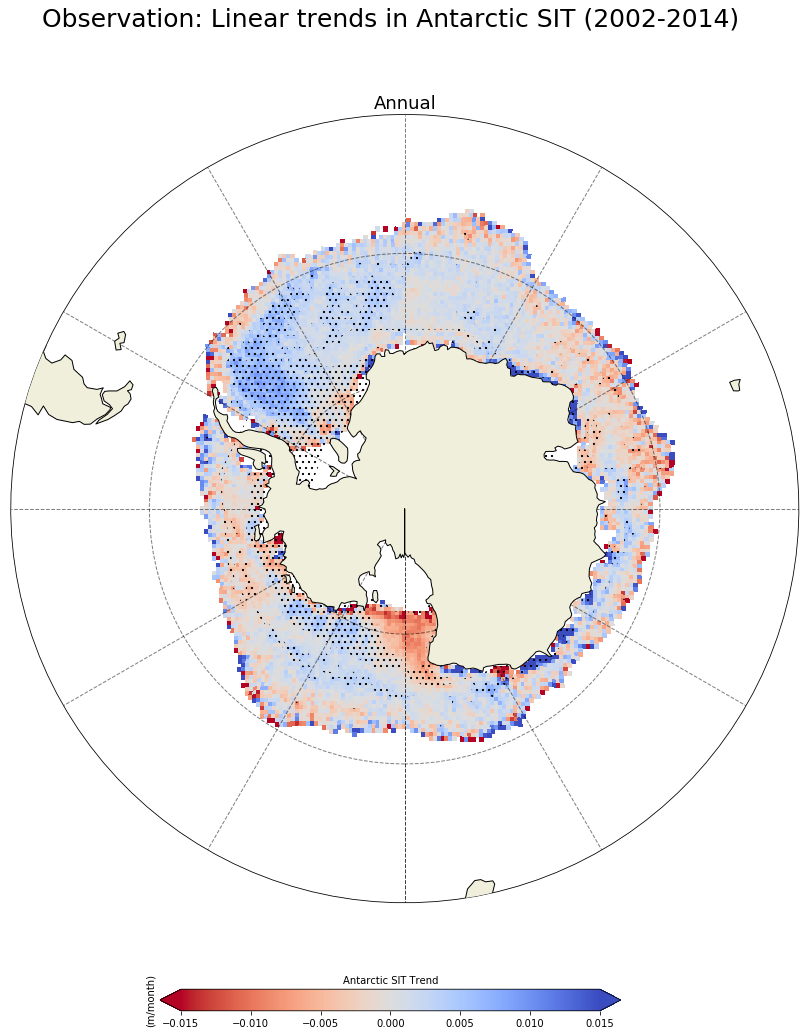

In [14]:
fig = plt.figure(figsize=(16,15))

ax = plt.subplot(1,1,1,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(sit_Obs, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.015,vmax=0.015) 
levels = [Obs_Trend.p_value.min(), 0.05, Obs_Trend.p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,Obs_Trend.p_value, levels=levels, hatches=["..", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("Annual", fontsize=18, y=1)

fig.suptitle("Observation: Linear trends in Antarctic SIT (2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('Antarctic SIT Trend',fontsize=10)
cbar.ax.set_ylabel('(m/month)', fontsize=10)
plt.show()


In [15]:
fig = plt.figure(figsize=(16,15))

ax = plt.subplot(2,2,1,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_DJF, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 
levels = [linear_trend(Obs_DJF, 'time').p_value.min(), 0.05, linear_trend(Obs_DJF, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_DJF, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("DJF", fontsize=18, y=1)




ax = plt.subplot(2,2,2,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_MAM, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 
levels = [linear_trend(Obs_MAM, 'time').p_value.min(), 0.05, linear_trend(Obs_MAM, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_MAM, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("MAM", fontsize=18, y=1)





ax = plt.subplot(2,2,3,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_JJA, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 

levels = [linear_trend(Obs_JJA, 'time').p_value.min(), 0.05, linear_trend(Obs_JJA, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_JJA, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("JJA", fontsize=18, y=1)



ax = plt.subplot(2,2,4,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_SON, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 
levels = [linear_trend(Obs_SON, 'time').p_value.min(), 0.05, linear_trend(Obs_SON, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_SON, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("SON", fontsize=18, y=1)

fig.suptitle("Observation: Linear trends in Antarctic SIT (2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('Antarctic SIT Trend',fontsize=10)
cbar.ax.set_ylabel('(m/year)', fontsize=10)

plt.savefig('SIT_Linear_Trends_Obs.pdf',dpi=300, bbox_inches='tight')

plt.show()


/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([], <a list of 0 Text xticklabel objects>)

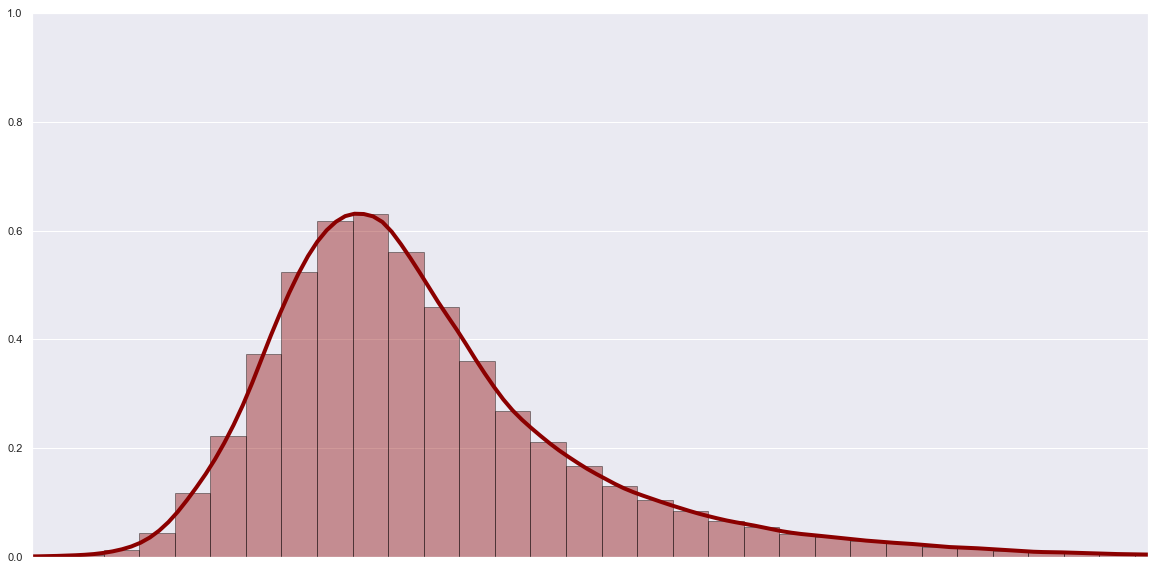

In [286]:
g2 = sns.distplot(sit_Obs_Regridded, hist=True, kde=True, 
             color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})

g2.set(ylabel="")
g2.set(xlabel="")

g2.set(ylim=(0, 1))
g2.set(xlim=(0, 6))

# g2.set(yticks=[])
# g2.set(xticks=[])

plt.xticks([])

In [ ]:
ax = plt.subplot(6,6,1)
plt.xticks([])

ax = plt.subplot(6,6,2)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,3)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,4)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,5)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,6) 
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,7)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])


ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])


ax = plt.subplot(6,6,35)
plt.xticks([])


ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

In [54]:
fig = plt.figure(figsize=[16,15])


for i in range(1,36):
    ax = plt.subplot(7,6,i)
    this = sns.distplot(xr.open_dataset(mydir+myfiles[i-1]).sithick.sel(time=slice('2002-06-01','2015-01-01')), 
                 hist=True, kde=True, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 3})
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 1))
    this.set(xlim=(0, 6))
#     this.set(yticks=[])
#     this.set(xticks=[])
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)  

for i in range(1,34):
    ax = plt.subplot(7,6,i)
    plt.xticks([])

ax = plt.subplot(7,6,35)
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36)
this = sns.distplot(sit_Obs_Regridded, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("Observation")


ax = plt.subplot(7,6,35)
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36)
this = sns.distplot(sit_Obs_Regridded, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("ENV-CS2 (2002-2014)")


ax = plt.subplot(7,6,37)
this = sns.distplot(GIOMAS_SIT, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("GIOMAS")


ax = plt.subplot(7,6,38)
this = sns.distplot(GECCO_SIT, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("GECCO3")


ax = plt.subplot(7,6,39)
this = sns.distplot(GECCO_SIT, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("GREP (1993-2014)")

# plt.subplots_adjust(hspace=.4, bottom = .3)

fig.suptitle("Probability Distribution for SIT Gridded data (1979-2014)",fontsize=25,y=0.93)

plt.savefig('SIT_PD_All_RN.pdf')

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

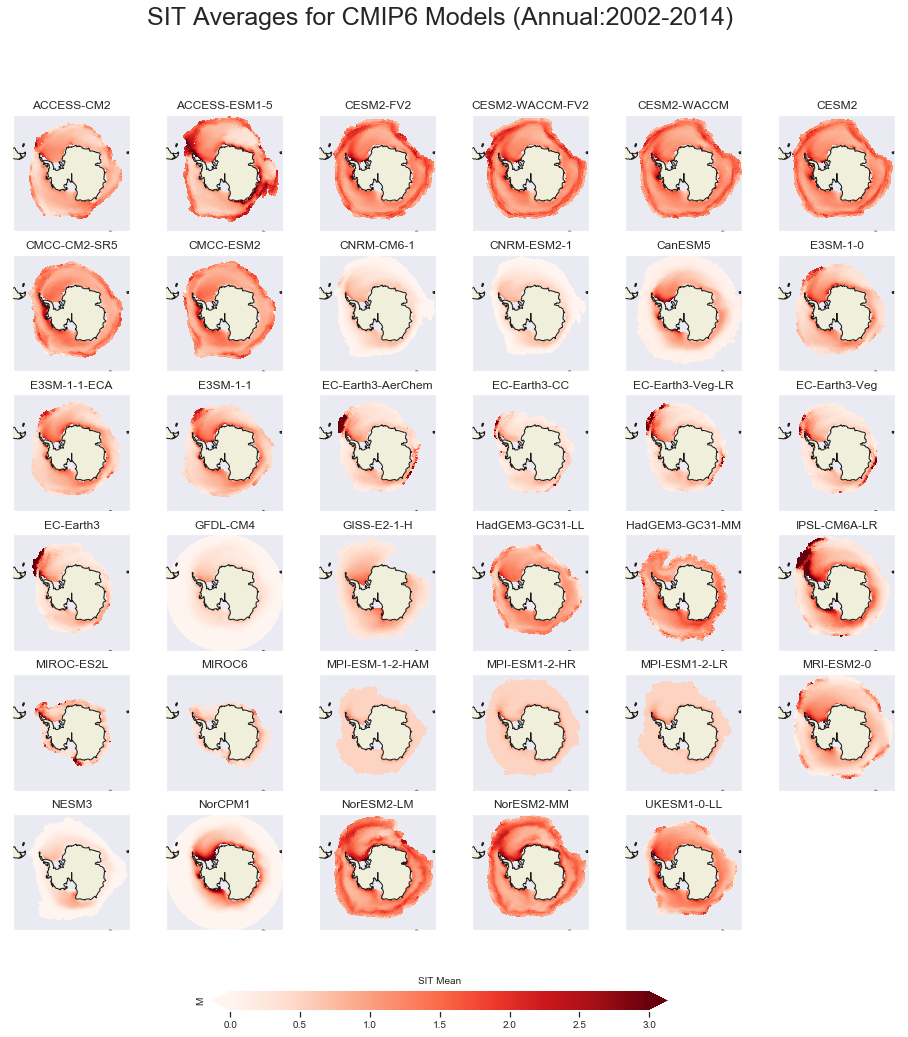

In [271]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         xr.open_dataset(mydir+myfiles[i-1]).sithick.sel(time=slice('2002-06-01','2015-01-01')).mean(dim='time'),transform=ccrs.PlateCarree(),
                         cmap = plt.cm.Reds, vmin=0, vmax=3)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


# ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
# ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
# ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
# this = ax.pcolormesh(ds_sit_Ob.lon,ds_sit_Ob.lat,ds_sit_Ob.sea_ice_thickness.mean(dim='time'),transform=ccrs.PlateCarree(),cmap = plt.cm.Reds, vmin=0, vmax=3)
# #CS = ax.contour(ds_sic_Ob.lon,ds_sic_Ob.lat,ds_sic_Ob.SIC.mean(dim='time'),[0.15],transform=ccrs.PlateCarree(),colors='k')
# plt.title("Observation (ESA-CCI+)")


fig.suptitle("SIT Averages for CMIP6 Models (Annual:2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('SIT_AVg_Annual.pdf')

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

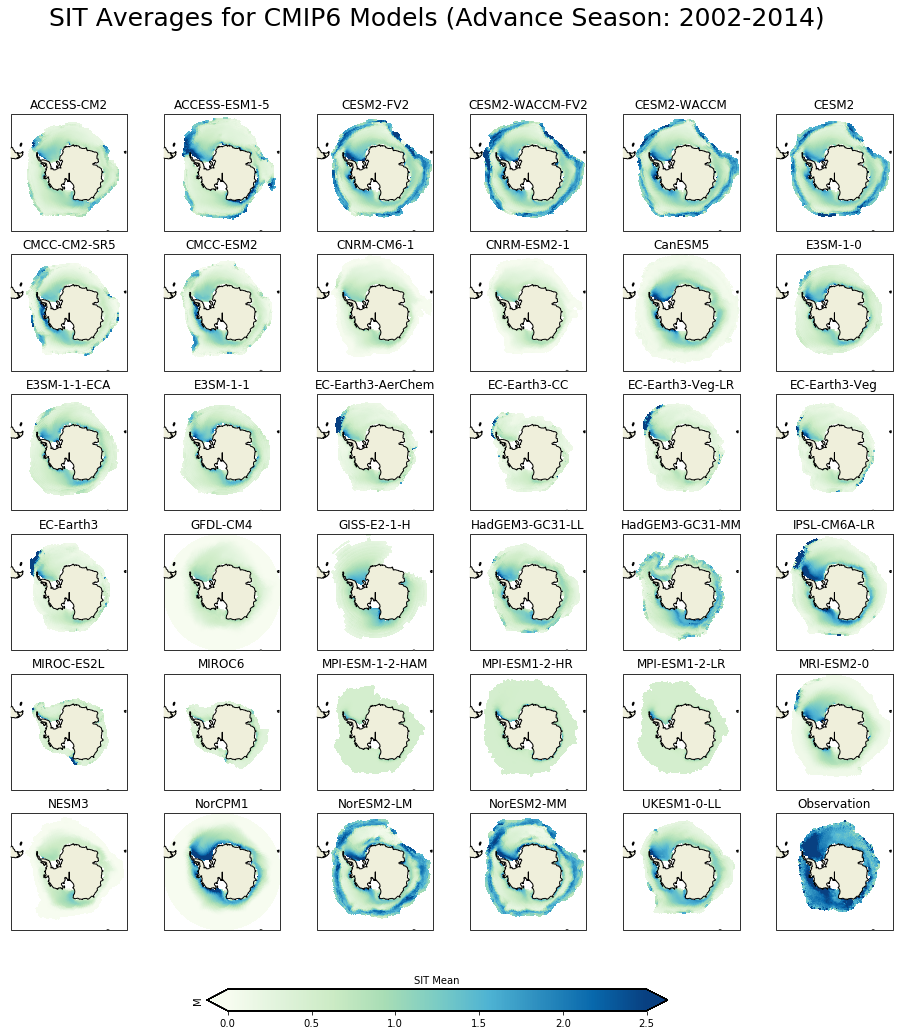

In [56]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         SpatialPlots_AR(clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2])[1].mean(dim='time'),transform=ccrs.PlateCarree(),
                         cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL")    

ax = plt.subplot(6,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
this = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,(SpatialPlots_AR(sit_Obs_Regridded)[1]).mean(dim='time'),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
plt.title("Observation")


fig.suptitle("SIT Averages for CMIP6 Models (Advance Season: 2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('SIT_Avg_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

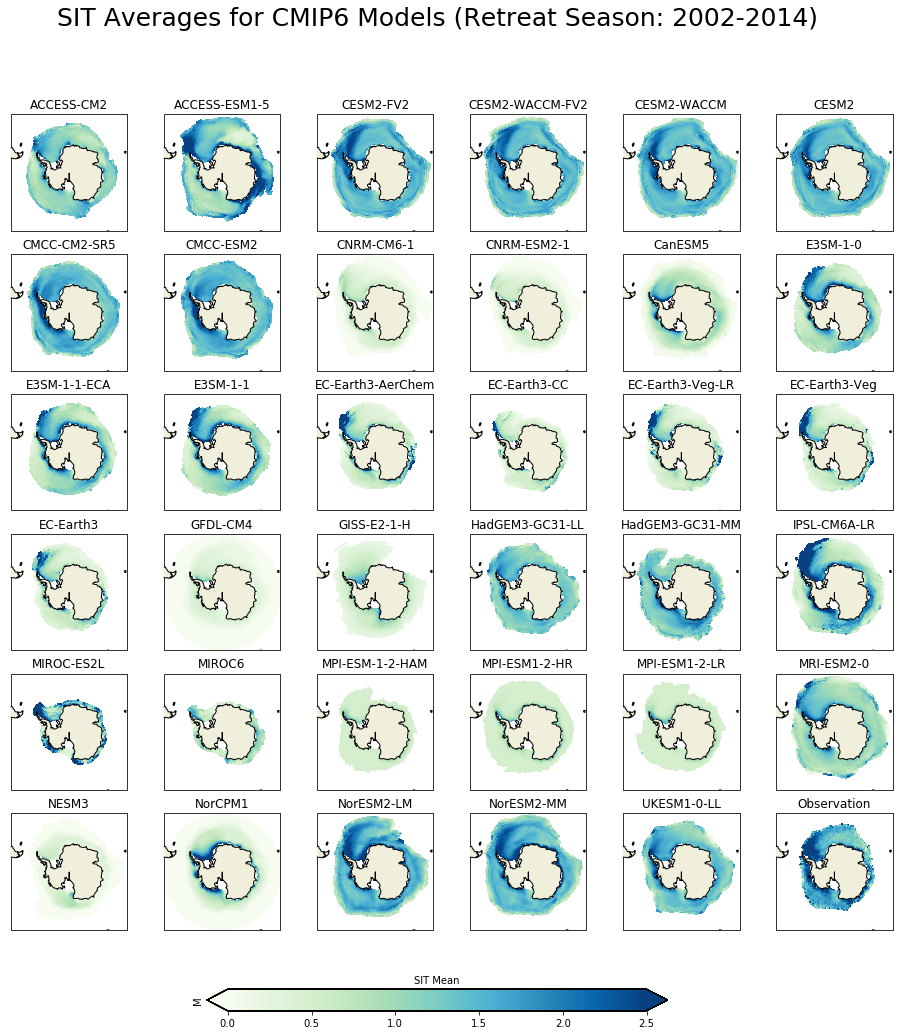

In [58]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         SpatialPlots_AR(clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2])[0].mean(dim='time'),transform=ccrs.PlateCarree(),
                         cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL")    

ax = plt.subplot(6,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
this = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,(SpatialPlots_AR(sit_Obs_Regridded)[0]).mean(dim='time'),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
plt.title("Observation")


fig.suptitle("SIT Averages for CMIP6 Models (Retreat Season: 2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('SIT_Avg_Ret.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

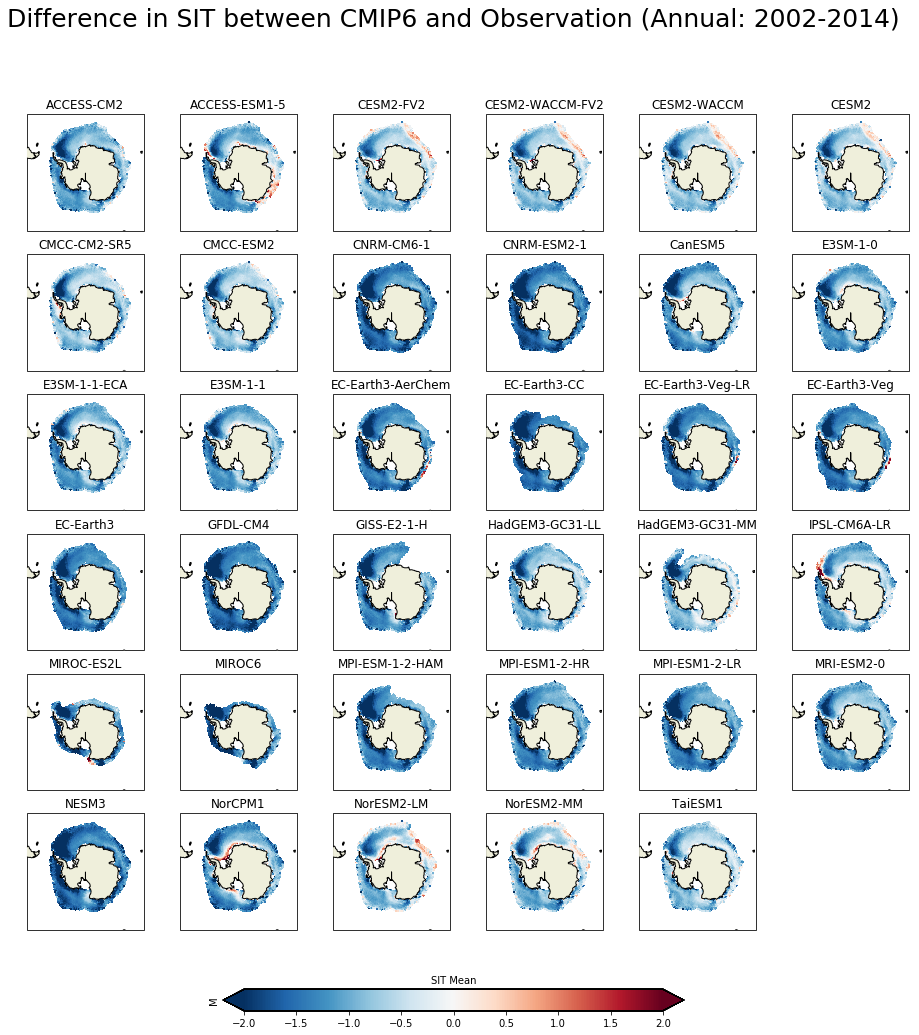

In [53]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         (clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2]).mean(dim='time')-sit_Obs_Regridded.mean(dim='time'),
                       transform=ccrs.PlateCarree(),
                         cmap = plt.cm.RdBu_r, vmin=-2, vmax=2)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


# ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
# ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
# ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
# this = ax.pcolormesh(ds_sit_Ob.lon,ds_sit_Ob.lat,ds_sit_Ob.sea_ice_thickness.mean(dim='time'),transform=ccrs.PlateCarree(),cmap = plt.cm.Reds, vmin=0, vmax=3)
# #CS = ax.contour(ds_sic_Ob.lon,ds_sic_Ob.lat,ds_sic_Ob.SIC.mean(dim='time'),[0.15],transform=ccrs.PlateCarree(),colors='k')
# plt.title("Observation (ESA-CCI+)")


fig.suptitle("Difference in SIT between CMIP6 and Observation (Annual: 2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

#plt.savefig('ClimMean_Observation.pdf')

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

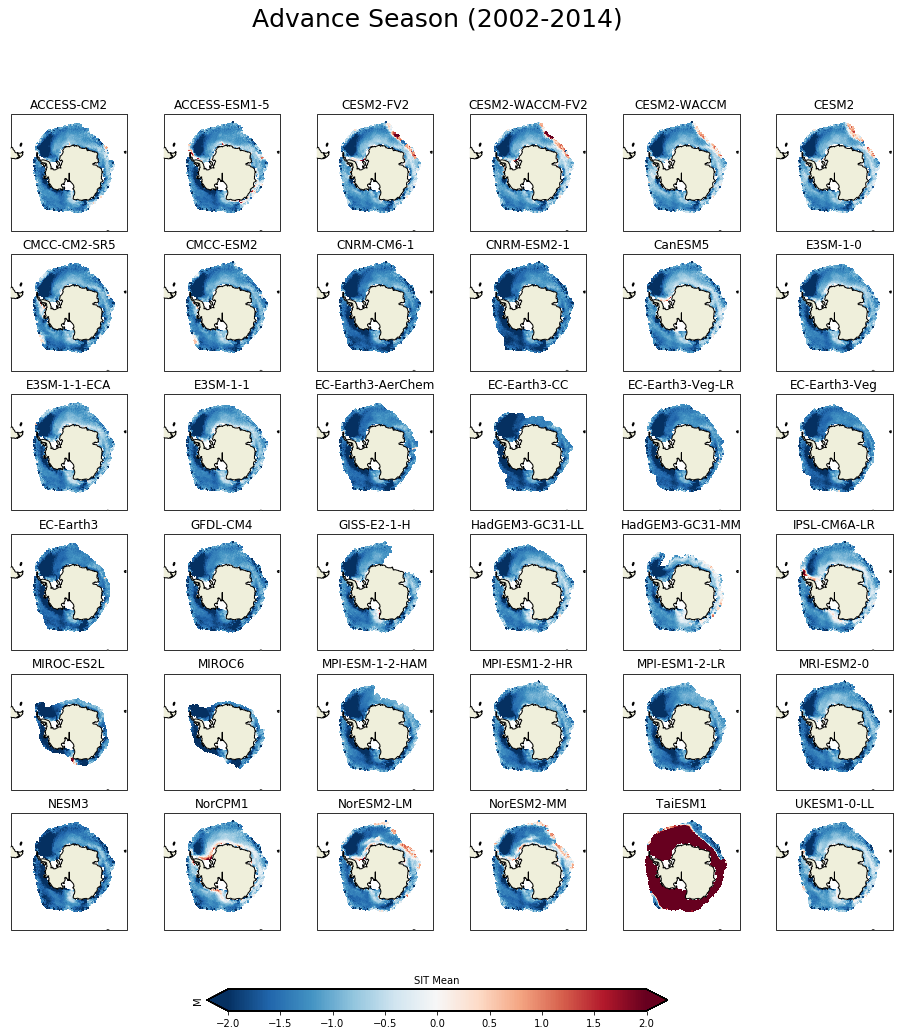

In [24]:
fig = plt.figure(figsize=[16,15])

for i in range(1,37):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         SpatialPlots_AR(clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2])[1].mean(dim='time')-SpatialPlots_AR(sit_Obs_Regridded)[1].mean(dim='time'),
                       transform=ccrs.PlateCarree(),
                         cmap = plt.cm.RdBu_r, vmin=-2, vmax=2)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


# ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
# ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
# ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
# this = ax.pcolormesh(ds_sit_Ob.lon,ds_sit_Ob.lat,ds_sit_Ob.sea_ice_thickness.mean(dim='time'),transform=ccrs.PlateCarree(),cmap = plt.cm.Reds, vmin=0, vmax=3)
# #CS = ax.contour(ds_sic_Ob.lon,ds_sic_Ob.lat,ds_sic_Ob.SIC.mean(dim='time'),[0.15],transform=ccrs.PlateCarree(),colors='k')
# plt.title("Observation (ESA-CCI+)")


fig.suptitle("Advance Season (2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('Spatial_Bias_AS.pdf')

plt.show()
plt.close()

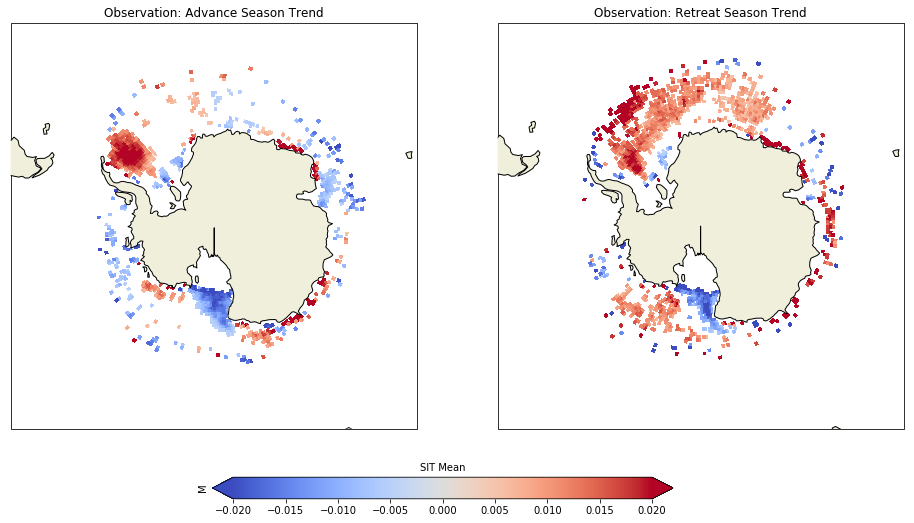

In [132]:
# Make a pcolor plot of sea ice concentration, and contour the sea ice edge
fig = plt.figure(figsize=[16,15])
ax = plt.subplot(1,2,1,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[1], 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,
                     (linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[1], 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("Observation: Advance Season Trend")

ax = plt.subplot(1,2,2,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')

p_val = linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[0], 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,
                     (linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[0], 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("Observation: Retreat Season Trend")
cbar_ax = fig.add_axes([0.3, 0.25, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.show()

In [57]:
def clim_anom_RN(data):
    sit = data.sithick.sel(time=slice('1979-01-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

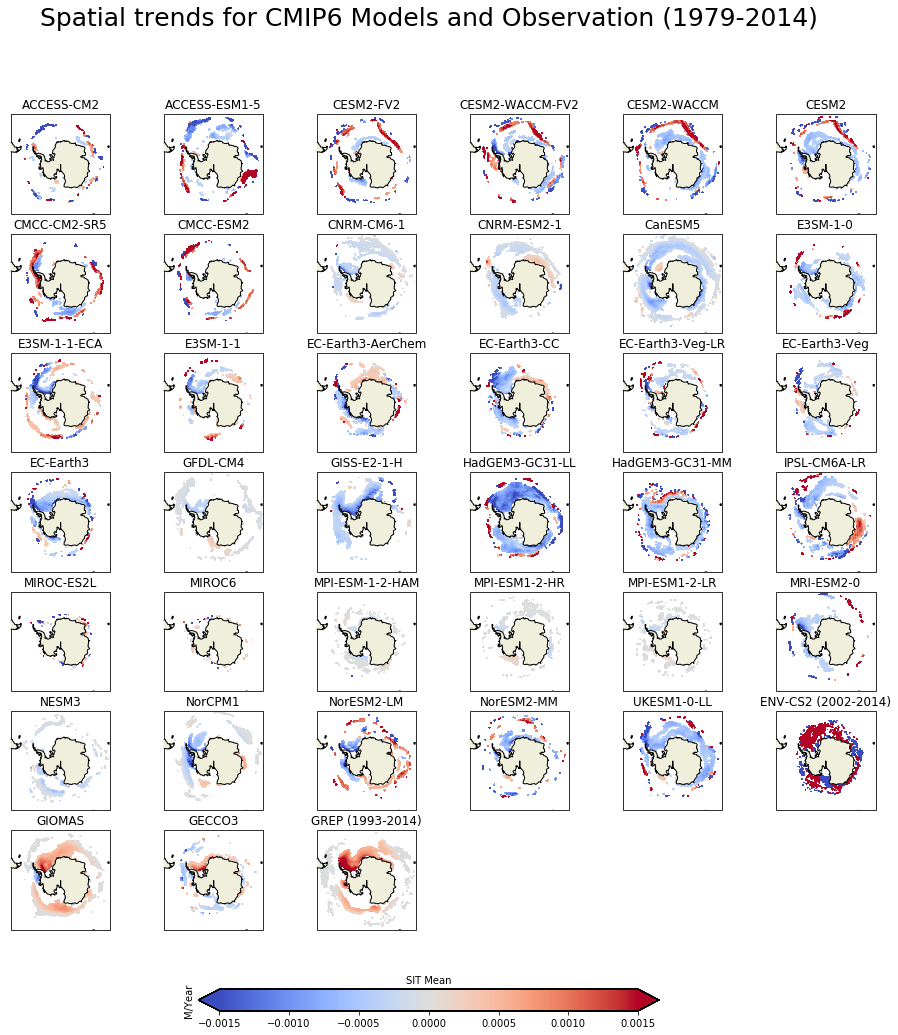

In [59]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    p_val = linear_trend((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]), 'time').p_value
    mask_PV = p_val.where(p_val < 0.05)

    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         (linear_trend((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((sit_Obs_Regridded), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,
                     (linear_trend((sit_Obs_Regridded), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("ENV-CS2 (2002-2014)")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((GIOMAS_SIT), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(GIOMAS_SIT.lon,GIOMAS_SIT.lat,
                     (linear_trend((GIOMAS_SIT), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((GECCO_SIT), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(GECCO_SIT.lon,GECCO_SIT.lat,
                     (linear_trend((GECCO_SIT), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((GREP_SIT), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(GREP_SIT.lon,GREP_SIT.lat,
                     (linear_trend((GREP_SIT), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("GREP (1993-2014)")


fig.suptitle("Spatial trends for CMIP6 Models and Observation (1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

plt.savefig('Spatial_Trends_RN_All.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

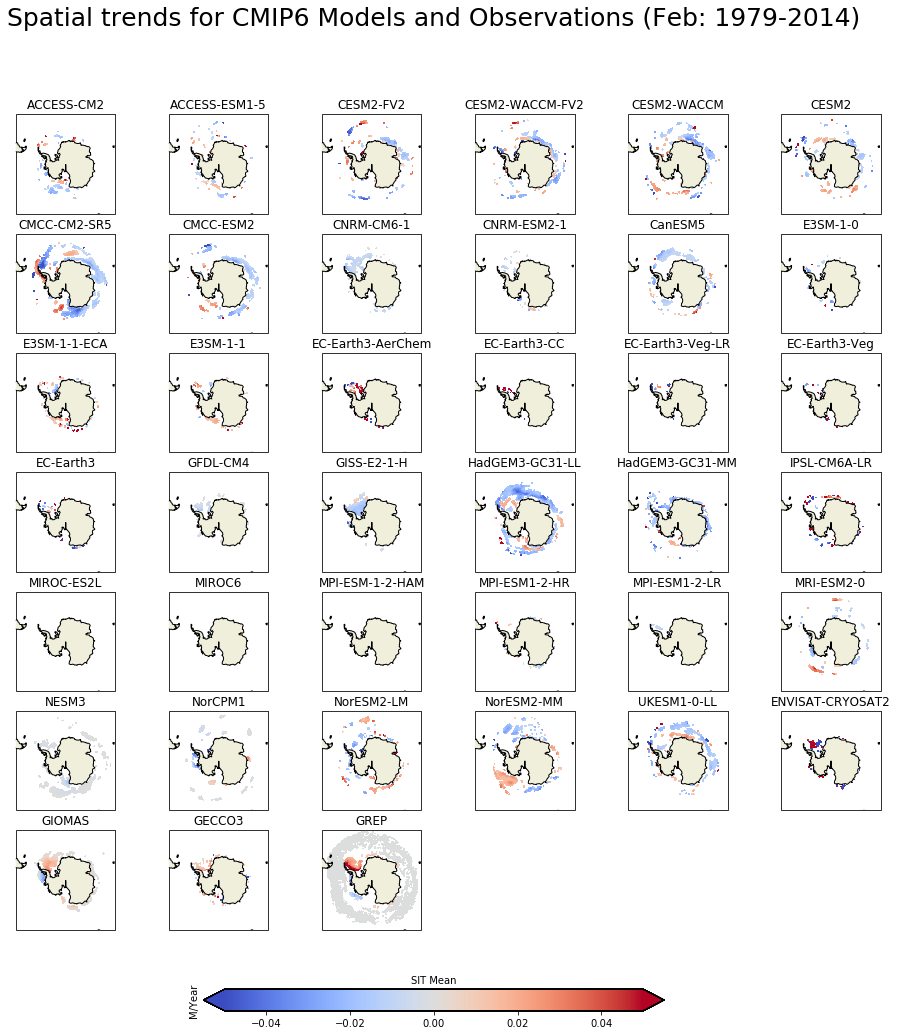

In [548]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),2)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.05)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (Feb: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

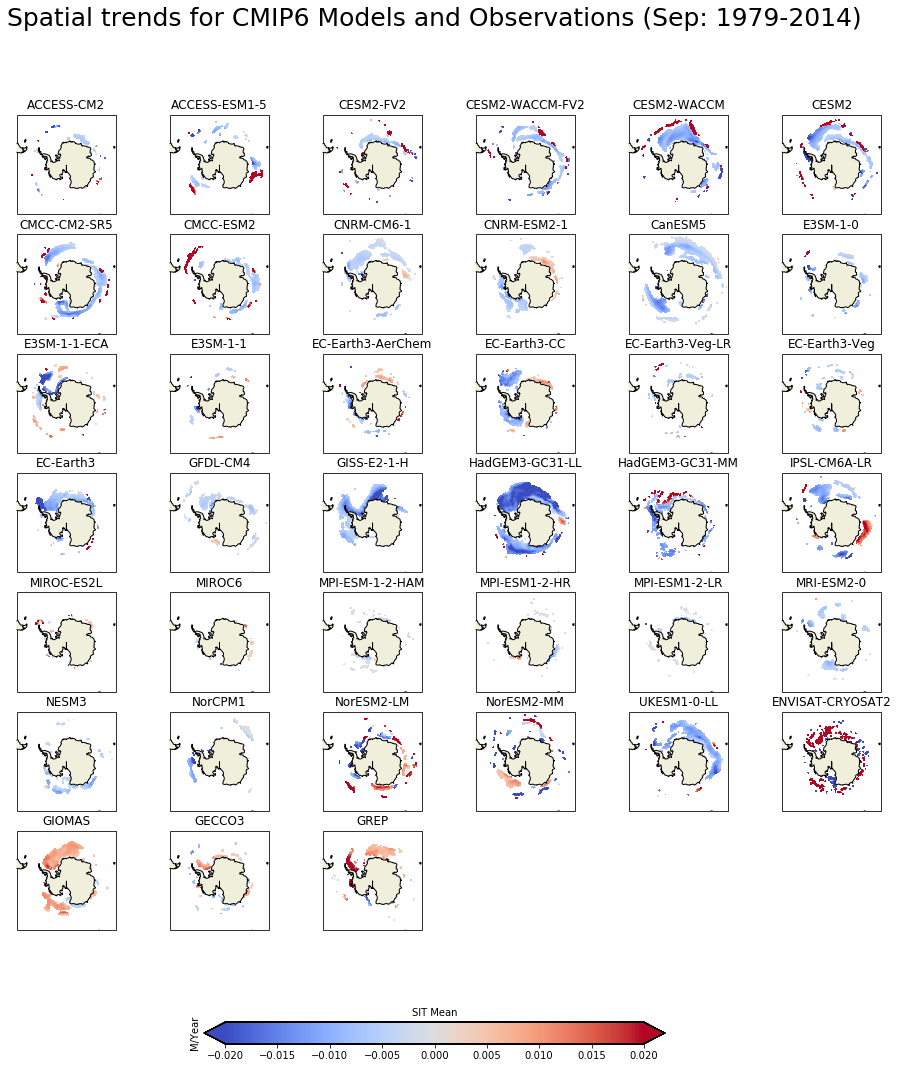

In [553]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),9)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.02)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (Sep: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

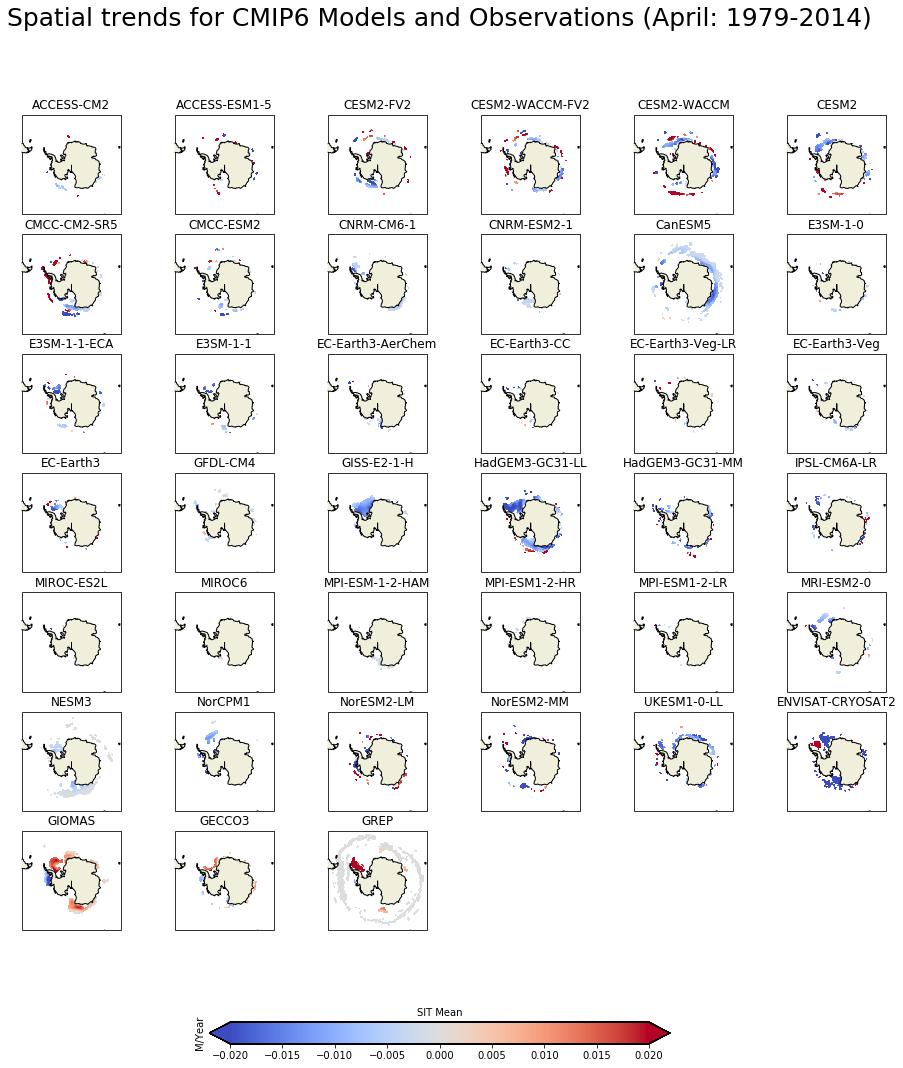

In [551]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),4)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.02)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (April: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

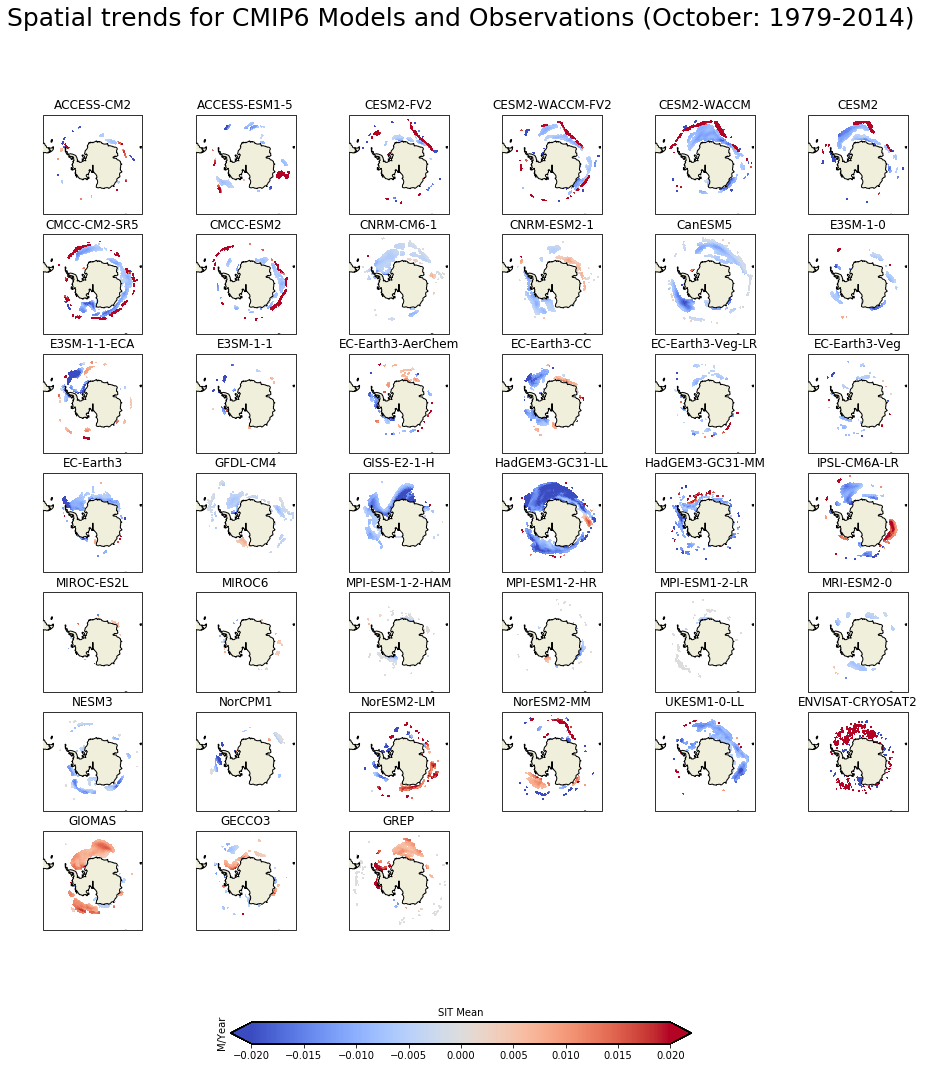

In [552]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),10)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.02)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (October: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()